In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../utils/')

import deepbayesHF
import deepbayesHF.optimizers as optimizers
from deepbayesHF import PosteriorModel

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical

from load_data import load_data

from pandas import read_csv
import string
import numpy as np
import subprocess
import os

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

import scipy

In [2]:
def print_exp(exp,text):
    '''
    for i in range(int(len(exp)/5)):
        for j in range(5):
            print('{:07.2f}'.format(exp[(i*5)+j]),end=' ')
        if i < len(text):
            print(text[i])
        else:
            print()
    '''
    
    xs = []
    ys = []
    for i in range(int(len(exp)/5)):
        total = np.sum(exp[(i*5):(i*5)+5])
        txt = text[i] if i < len(text) else '<PAD>'
        xs.append(txt)
        ys.append(total)
        
    objects = xs[::-1]
    y_pos = np.arange(len(objects))
    performance = ys[::-1]

    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel('Weight')
    plt.title('Word')

    plt.show()

# Load Data

In [3]:
maxlen = 10
emb_dims = 5
X_train, y_train, X_test, y_test, text_train, text_test = load_data('SST',maxlen,emb_dims,'../../training_data/','../../embeddings/',True)

In [8]:
print(X_train[0])
print(text_train[0])
print(X_train[0].shape)

[-0.1732389   0.18825129 -0.11132352  0.16556485  0.07364118  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
['brilliant']
(50,)


## Train model (optional)

In [7]:
model_name = f'SST_{maxlen}x{emb_dims}d_16_8_IG'

opt = optimizers.VariationalOnlineGuassNewton()
likelihood = tf.keras.losses.SparseCategoricalCrossentropy()
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=X_train[0].shape))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='softmax'))

bayes_model = opt.compile(model,loss_fn=likelihood,
                          epochs=25, learning_rate=0.25,
                          inflate_prior=2.0, log_file='tmp/log.txt')
bayes_model.train(X_train,y_train,X_test,y_test)
bayes_model.save(model_name)

This optimizer does not have a default compilation method. Please make sure to call the correct .compile method before use.
deepbayes: Using implicit prior
(50, 16) 0.2
(16, 8) 0.3535533905932738
(8, 2) 0.5
deepbayes: Using implicit prior
(50, 16) 0.2
(16, 8) 0.3535533905932738
(8, 2) 0.5


  1%|          | 12/1832 [00:00<00:15, 118.48it/s]

Epoch 1, loss: 0.488, acc: 0.745, val_loss: 0.777, val_acc: 0.795


  1%|          | 11/1832 [00:00<00:16, 109.33it/s]

Epoch 2, loss: 0.356, acc: 0.855, val_loss: 0.735, val_acc: 0.761


  1%|          | 10/1832 [00:00<00:19, 95.87it/s]

Epoch 3, loss: 0.326, acc: 0.864, val_loss: 0.564, val_acc: 0.781


  1%|          | 13/1832 [00:00<00:14, 124.99it/s]

Epoch 4, loss: 0.311, acc: 0.869, val_loss: 0.628, val_acc: 0.773


  1%|          | 12/1832 [00:00<00:15, 119.34it/s]

Epoch 5, loss: 0.314, acc: 0.869, val_loss: 0.582, val_acc: 0.795


  1%|          | 13/1832 [00:00<00:14, 122.87it/s]

Epoch 6, loss: 0.316, acc: 0.872, val_loss: 0.635, val_acc: 0.782


  1%|          | 13/1832 [00:00<00:14, 124.48it/s]

Epoch 7, loss: 0.309, acc: 0.872, val_loss: 0.592, val_acc: 0.785


  1%|          | 12/1832 [00:00<00:15, 119.70it/s]

Epoch 8, loss: 0.312, acc: 0.871, val_loss: 0.599, val_acc: 0.785


  1%|          | 13/1832 [00:00<00:14, 124.26it/s]

Epoch 9, loss: 0.307, acc: 0.872, val_loss: 0.559, val_acc: 0.786


  1%|          | 12/1832 [00:00<00:15, 118.89it/s]

Epoch 10, loss: 0.303, acc: 0.870, val_loss: 0.534, val_acc: 0.798


  1%|          | 13/1832 [00:00<00:14, 124.79it/s]

Epoch 11, loss: 0.302, acc: 0.875, val_loss: 0.526, val_acc: 0.799


  1%|          | 13/1832 [00:00<00:14, 124.35it/s]

Epoch 12, loss: 0.307, acc: 0.872, val_loss: 0.508, val_acc: 0.801


  1%|          | 12/1832 [00:00<00:15, 118.95it/s]

Epoch 13, loss: 0.313, acc: 0.868, val_loss: 0.459, val_acc: 0.805


  1%|          | 13/1832 [00:00<00:14, 124.38it/s]

Epoch 14, loss: 0.307, acc: 0.870, val_loss: 0.477, val_acc: 0.798


  1%|          | 13/1832 [00:00<00:14, 123.54it/s]

Epoch 15, loss: 0.295, acc: 0.877, val_loss: 0.499, val_acc: 0.791


  1%|          | 12/1832 [00:00<00:15, 119.51it/s]

Epoch 16, loss: 0.291, acc: 0.877, val_loss: 0.518, val_acc: 0.796


  1%|          | 11/1832 [00:00<00:16, 108.69it/s]

Epoch 17, loss: 0.294, acc: 0.876, val_loss: 0.525, val_acc: 0.795


  1%|          | 13/1832 [00:00<00:14, 123.88it/s]

Epoch 18, loss: 0.295, acc: 0.876, val_loss: 0.544, val_acc: 0.794


  1%|          | 12/1832 [00:00<00:15, 118.50it/s]

Epoch 19, loss: 0.294, acc: 0.877, val_loss: 0.563, val_acc: 0.796


  1%|          | 13/1832 [00:00<00:14, 124.01it/s]

Epoch 20, loss: 0.296, acc: 0.877, val_loss: 0.571, val_acc: 0.799


  1%|          | 13/1832 [00:00<00:14, 123.95it/s]

Epoch 21, loss: 0.298, acc: 0.877, val_loss: 0.551, val_acc: 0.801


  1%|          | 12/1832 [00:00<00:15, 117.35it/s]

Epoch 22, loss: 0.300, acc: 0.877, val_loss: 0.530, val_acc: 0.804


  1%|          | 13/1832 [00:00<00:14, 123.94it/s]

Epoch 23, loss: 0.301, acc: 0.875, val_loss: 0.528, val_acc: 0.804


  1%|          | 13/1832 [00:00<00:14, 124.33it/s]

Epoch 24, loss: 0.301, acc: 0.875, val_loss: 0.558, val_acc: 0.801


  1%|          | 11/1832 [00:00<00:17, 104.66it/s]

Epoch 25, loss: 0.300, acc: 0.876, val_loss: 0.575, val_acc: 0.797


100%|██████████| 1832/1832 [00:13<00:00, 133.86it/s]


Epoch 26, loss: 0.300, acc: 0.877, val_loss: 0.545, val_acc: 0.798
('batch_size', 64)
('learning_rate', 0.25)
('decay', 0.0)
('epochs', 26)
('inflate_prior', 2.0)
('input_noise', 0.0)
('robust_train', 0)
('epsilon', 0.1)
('robust_lambda', 0.5)
('loss_monte_carlo', 2)
('input_upper', inf)
('input_lower', -inf)
('beta_1', 0.999)
('beta_2', 0.9999)
('lam', 1.0)
('N', 117219)
('max_eps', 0.1)
('max_robust_lambda', 0.5)


# Load Model

In [9]:
model_name = f'SST_{maxlen}x{emb_dims}d_16_8_IG'
bayes_model = PosteriorModel(model_name)
y_pred = bayes_model.predict(X_test,n=50)
check_accuracy = tf.keras.metrics.Accuracy(name="train_acc")
check_accuracy(y_test,np.argmax(y_pred,axis=1))
print()
print('Loaded model accuracy:',f'{check_accuracy.result().numpy()*100:.2f}%')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 970
Trainable params: 970
Non-trainable params: 0
_________________________________________________________________
deepbayes: detected the above model 
 None

Loaded model accuracy: 80.00%


# Random positive example runs

In [46]:
N = 50
n = 0
while True:
    n = np.random.choice(list(range(len(X_train))))
    if y_train[n] == 0:
        break


print(n)
        
print(X_train[n].shape)
X = X_train[n].reshape(1,*X_train[n].shape)
y_hat = np.argmax(bayes_model.predict(X,n=N))
y_class = 'Positive.' if y_hat == 1 else 'Negative.'
y_true_text = 'Positive.' if y_train[n] == 1 else 'Negative.'
print(text_train[n])
print('Prediction:',y_class,'Ground truth:',y_true_text)
input_shape = X.flatten().shape

83333
(50,)
['of', 'hollow', 'despair']
Prediction: Negative. Ground truth: Negative.


### explanation calculation (takes about 10secs)

In [47]:
input_path = 'X_tmp.npy'
y_path = 'y_tmp.npy'
output_path = f'exps/exps_idx{n}_{y_train[n]}'
if not os.path.exists(output_path):
    os.mkdir(output_path)
np.save(os.path.join(output_path,input_path),X.astype("float32"),False)
np.save(os.path.join(output_path,y_path),y_hat.astype("float32"),False)
iterations = 20
for i in range(iterations):
    subprocess.Popen(['python3','get_ig_exp.py',str(i),model_name,os.path.join(output_path,input_path),output_path,str(2)])

full = False 
while not full:
    if len([name for name in os.listdir(output_path) if os.path.isfile(os.path.join(output_path, name))]) >= (iterations+1):
        full = True

Input: ['in', 'a', 'collectively', 'stellar', 'performance']
Class: 1
Experiment #0
Explanation for class 0


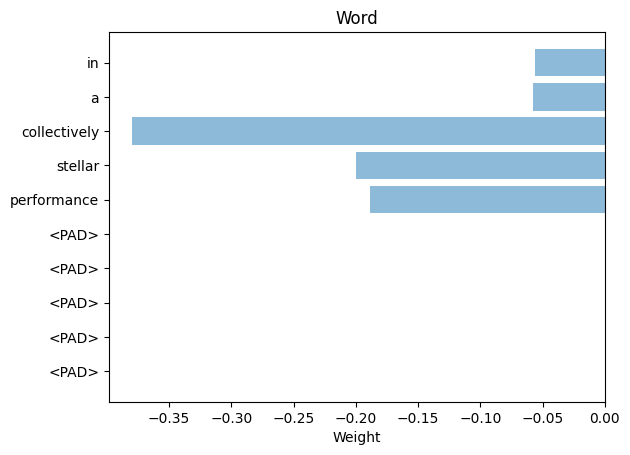

Explanation for class 1


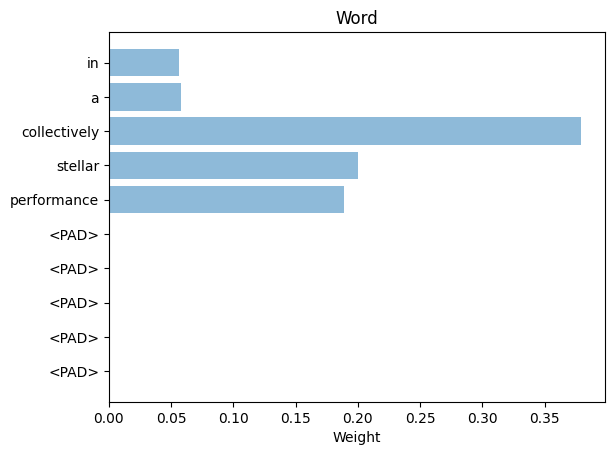

Experiment #1
Explanation for class 0


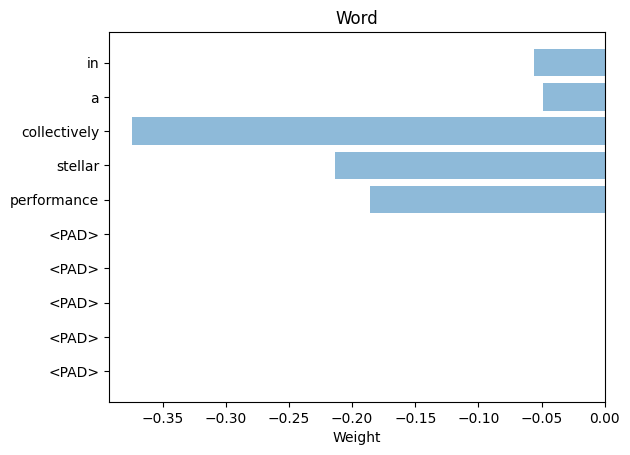

Explanation for class 1


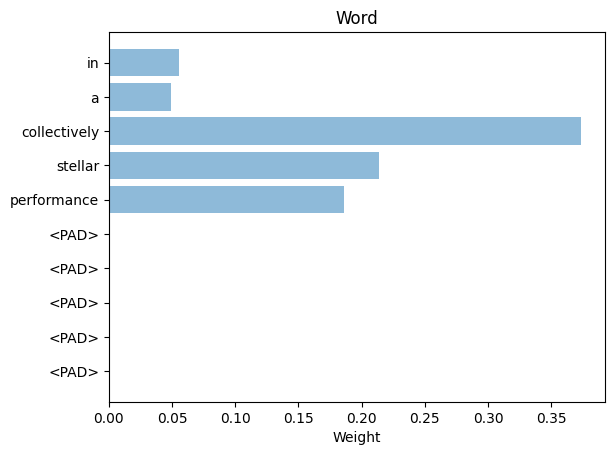

Experiment #2
Explanation for class 0


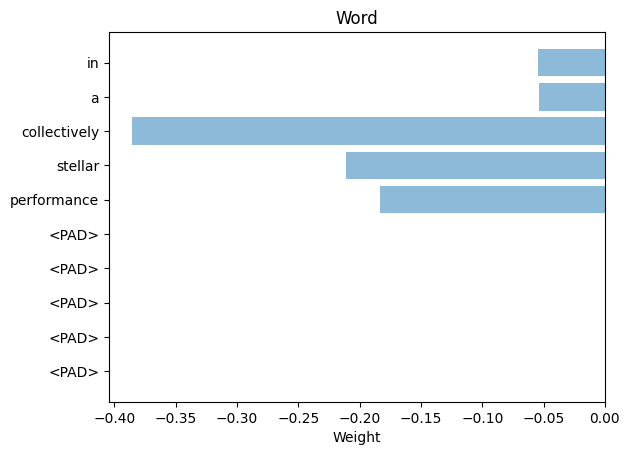

Explanation for class 1


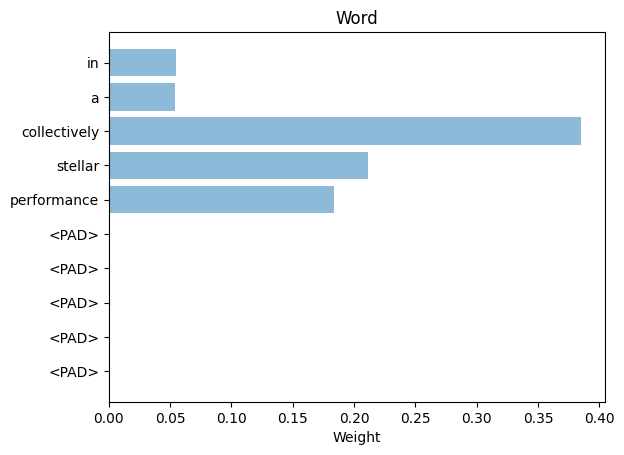

Experiment #3
Explanation for class 0


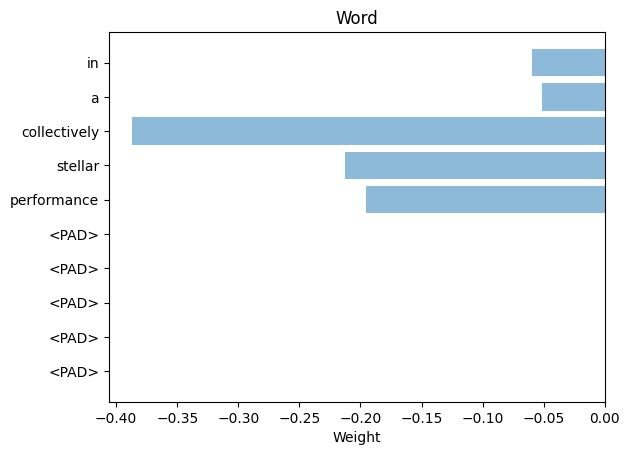

Explanation for class 1


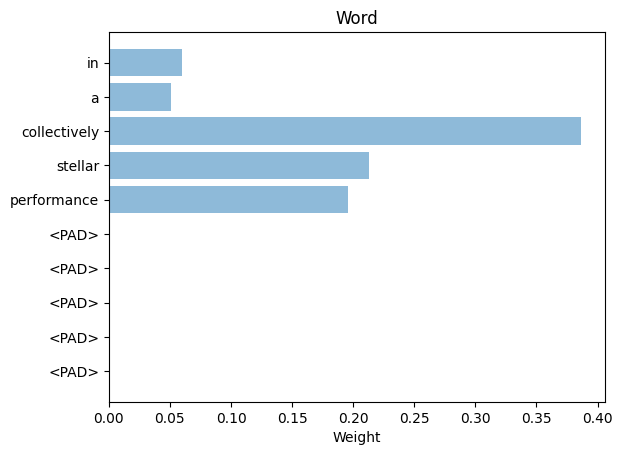

Experiment #4
Explanation for class 0


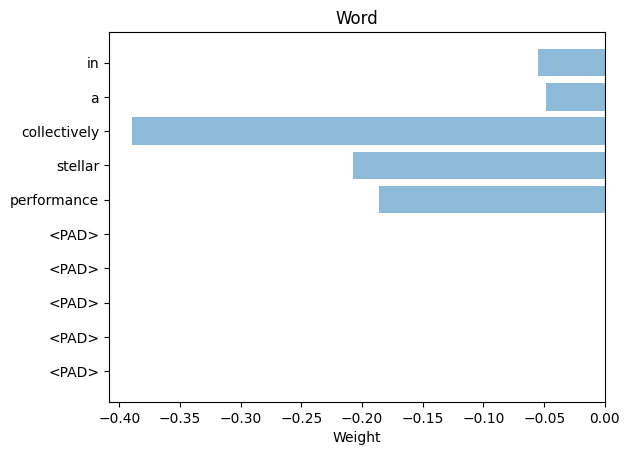

Explanation for class 1


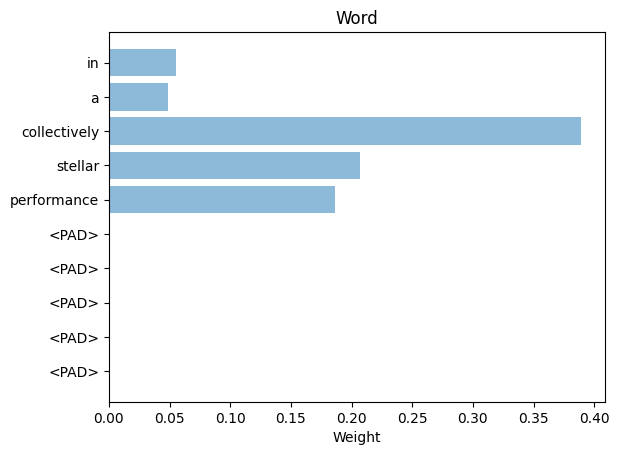

Experiment #5
Explanation for class 0


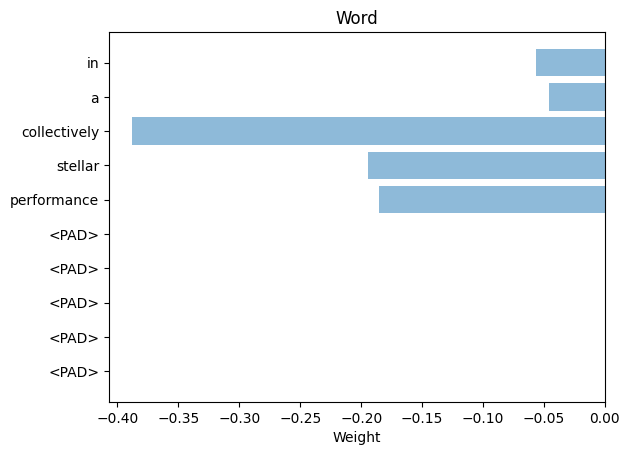

Explanation for class 1


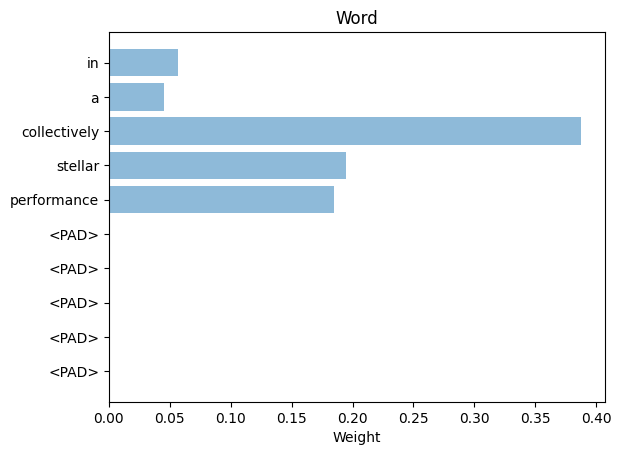

Experiment #6
Explanation for class 0


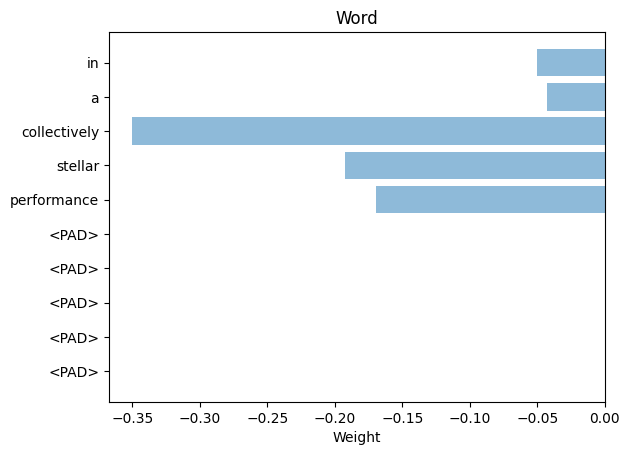

Explanation for class 1


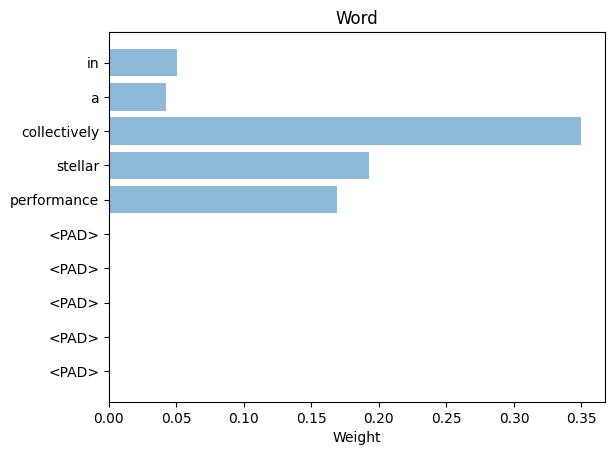

Experiment #7
Explanation for class 0


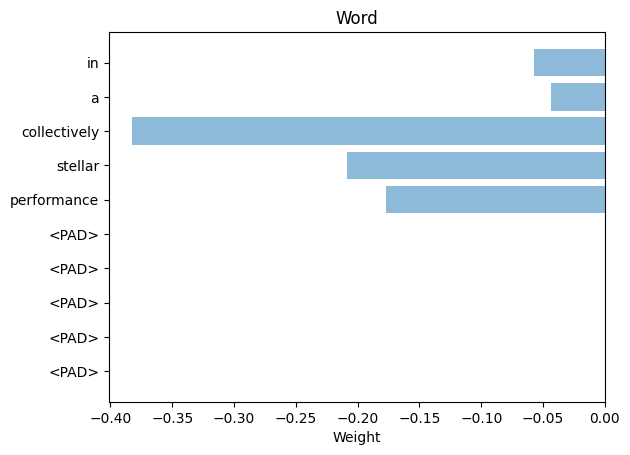

Explanation for class 1


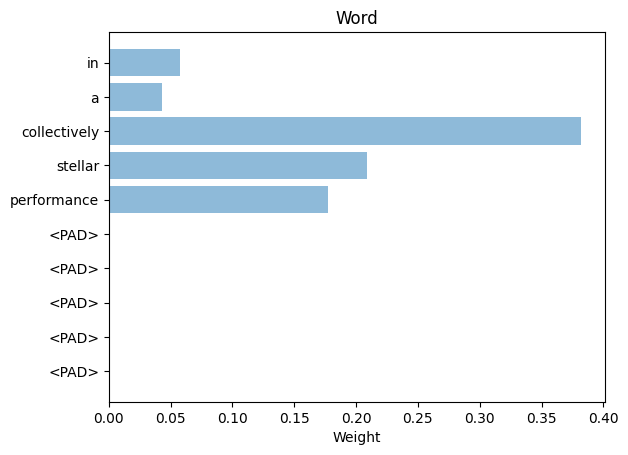

Experiment #8
Explanation for class 0


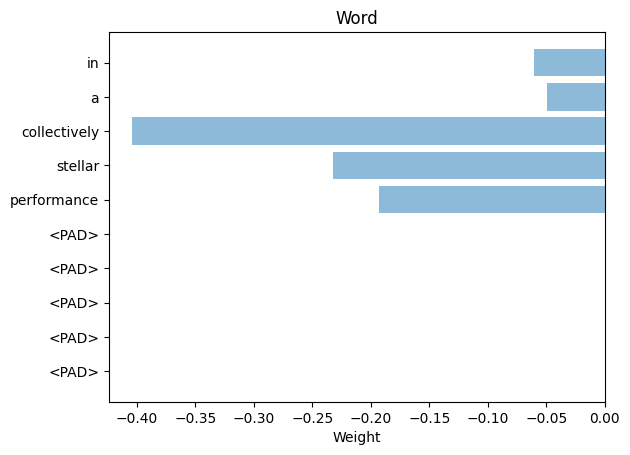

Explanation for class 1


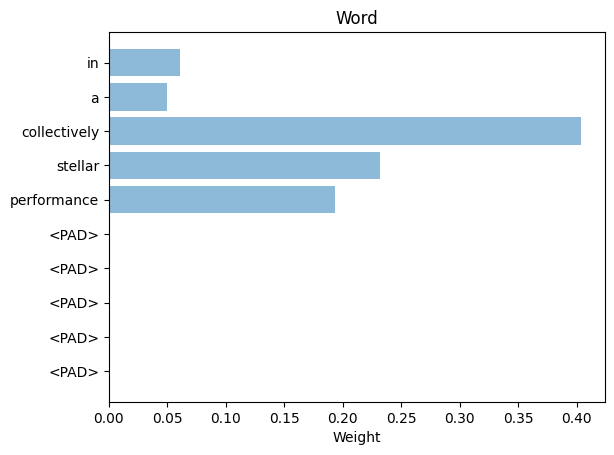

Experiment #9
Explanation for class 0


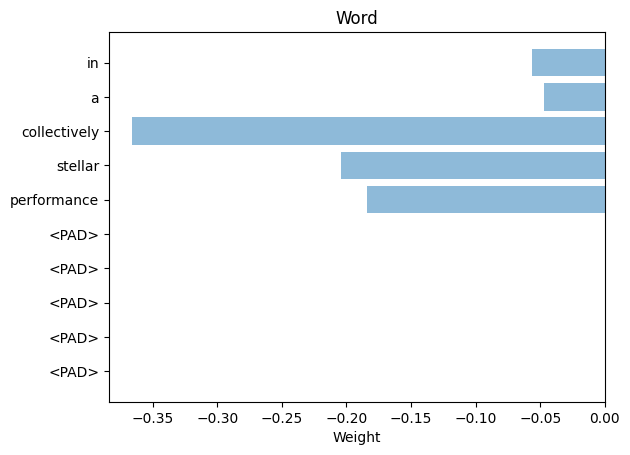

Explanation for class 1


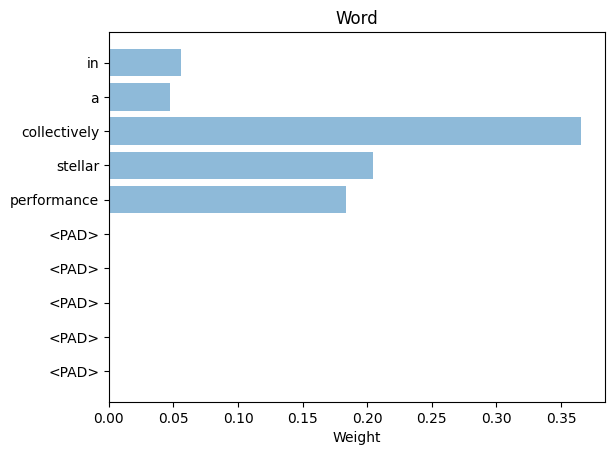

Experiment #10
Explanation for class 0


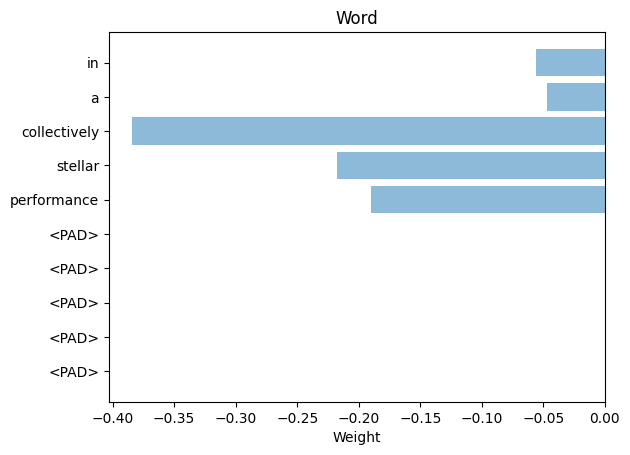

Explanation for class 1


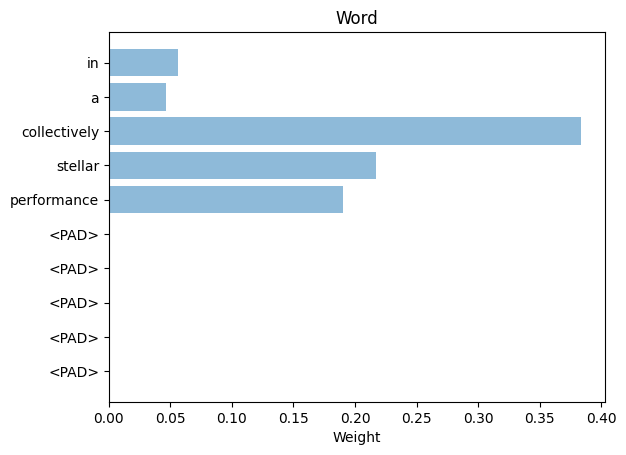

Experiment #11
Explanation for class 0


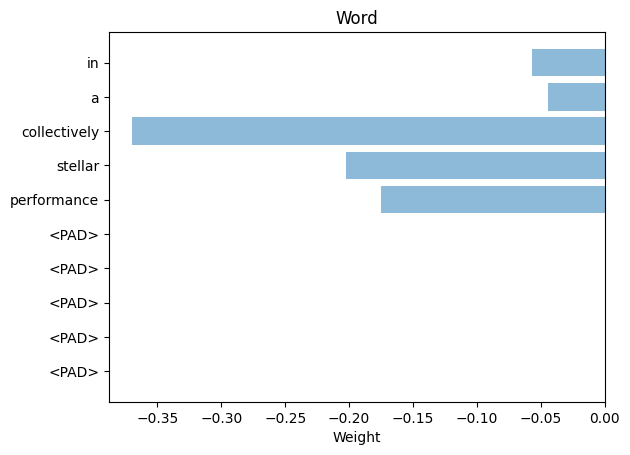

Explanation for class 1


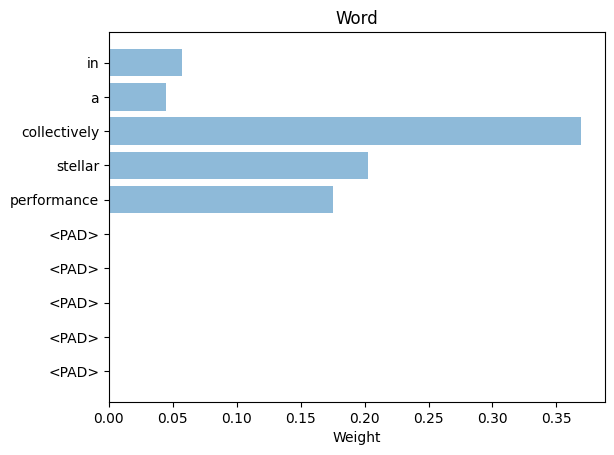

Experiment #12
Explanation for class 0


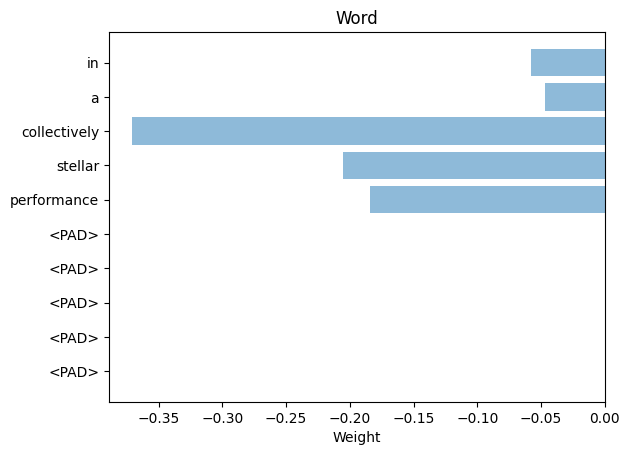

Explanation for class 1


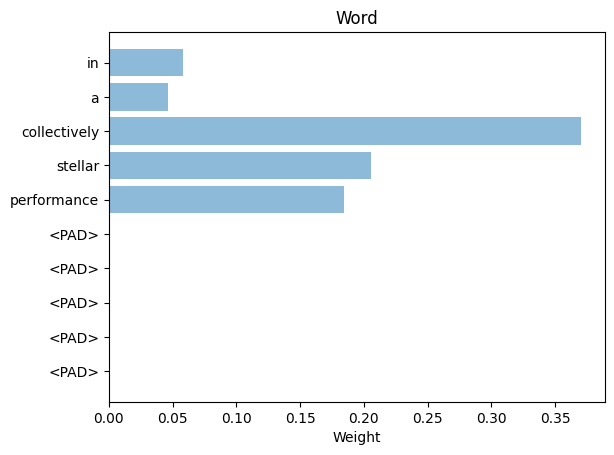

Experiment #13
Explanation for class 0


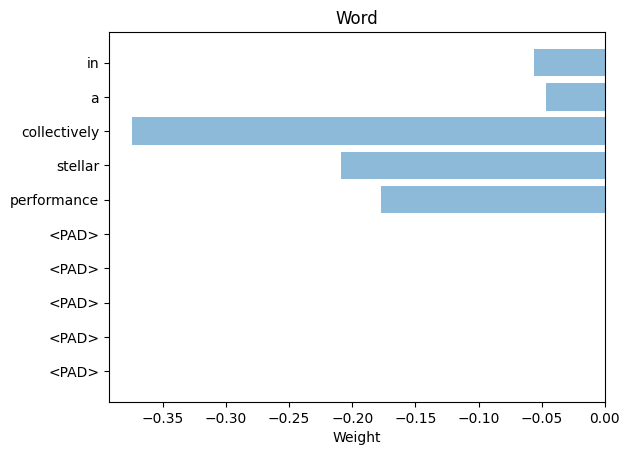

Explanation for class 1


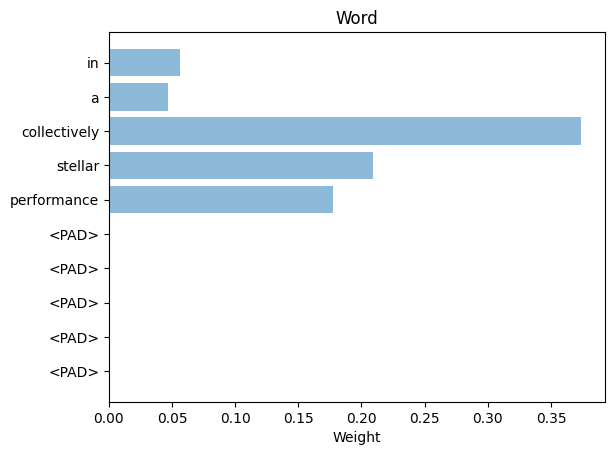

Experiment #14
Explanation for class 0


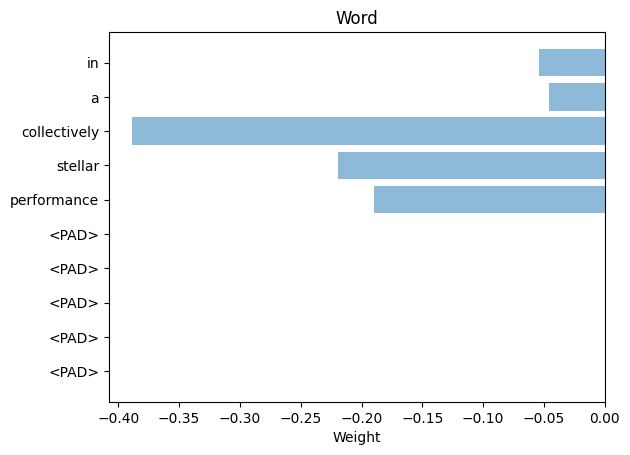

Explanation for class 1


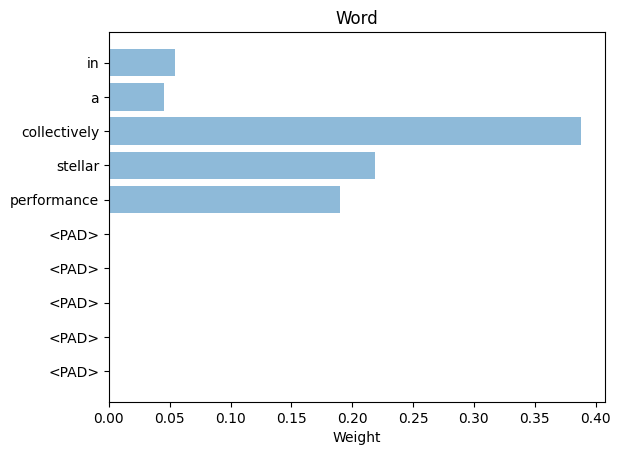

Experiment #15
Explanation for class 0


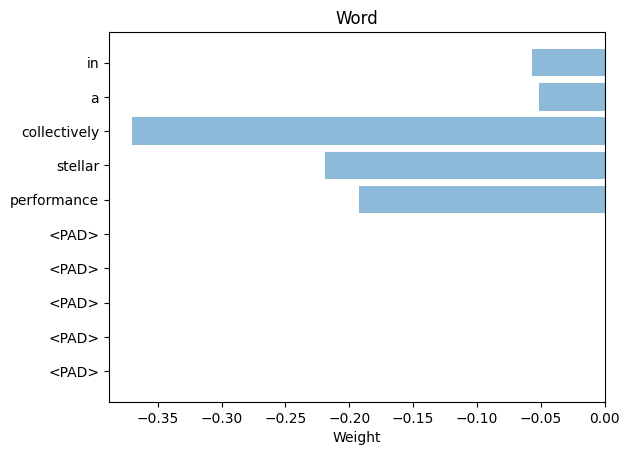

Explanation for class 1


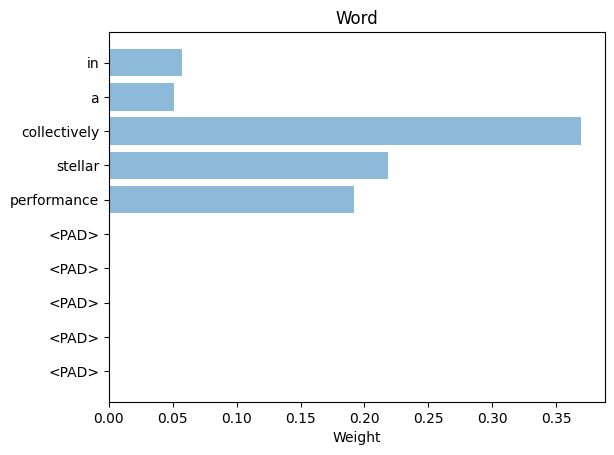

Experiment #16
Explanation for class 0


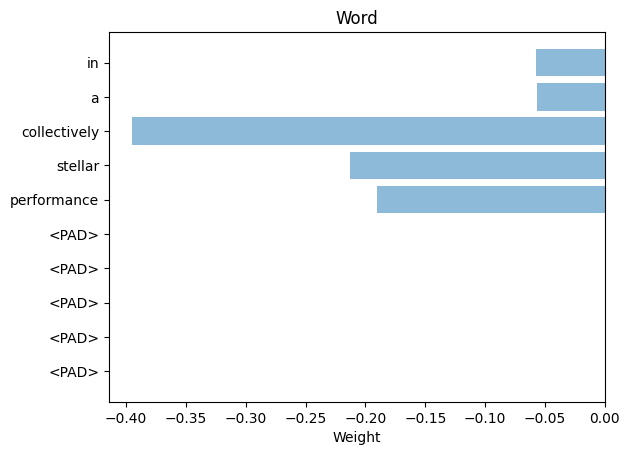

Explanation for class 1


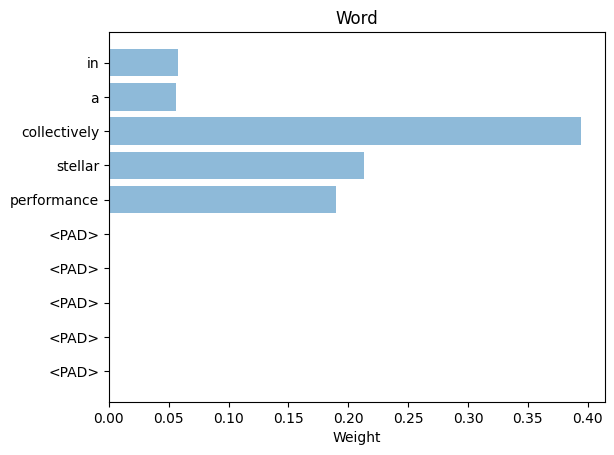

Experiment #17
Explanation for class 0


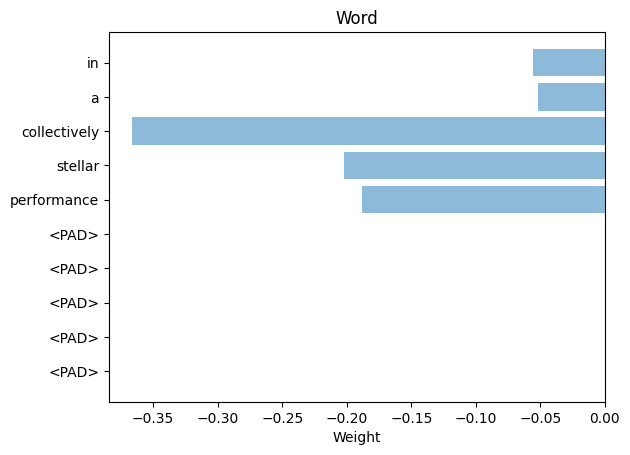

Explanation for class 1


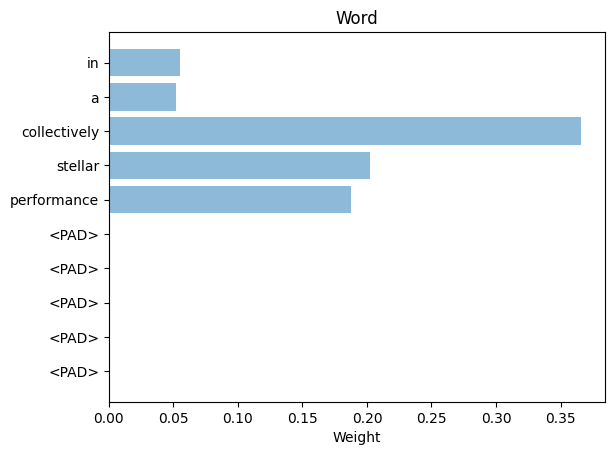

Experiment #18
Explanation for class 0


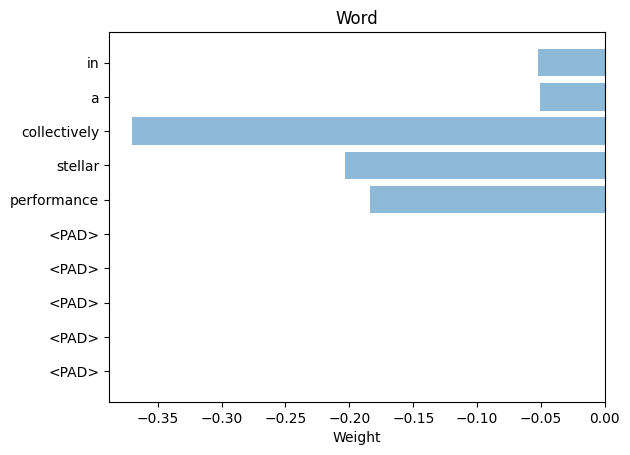

Explanation for class 1


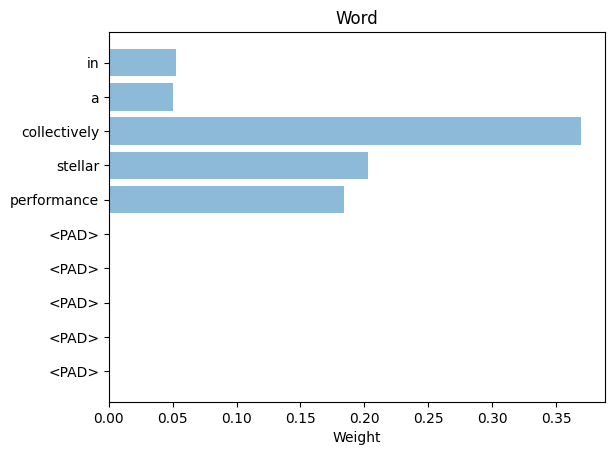

Experiment #19
Explanation for class 0


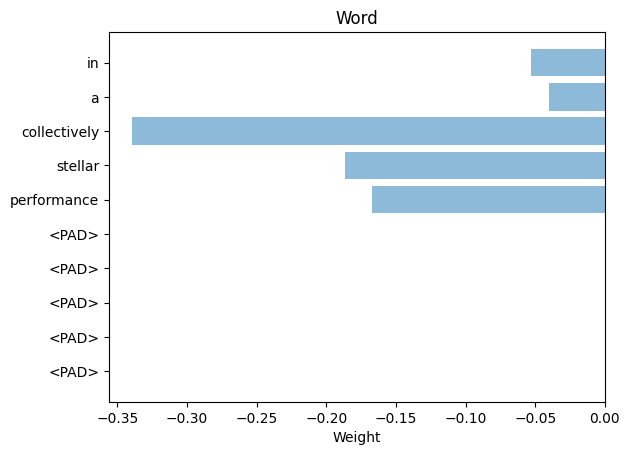

Explanation for class 1


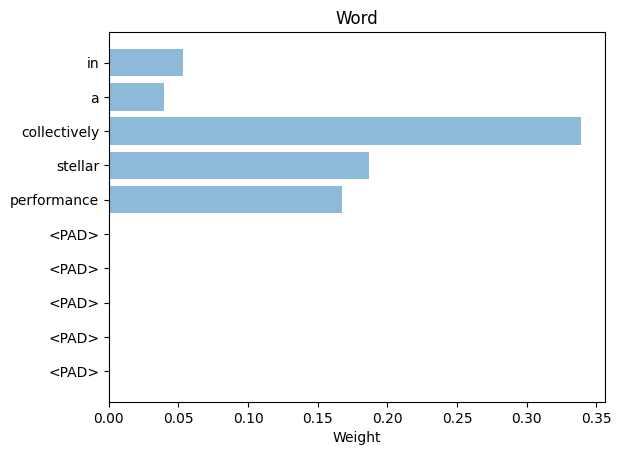


------------------------------------------------------------------

Input: ['of', 'hollow', 'despair']
Class: 0
Experiment #0
Explanation for class 0


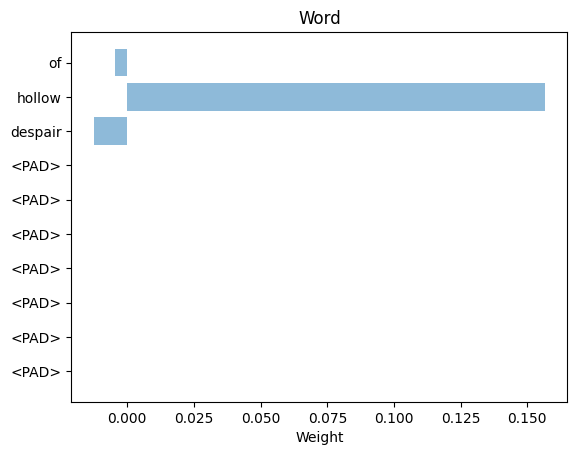

Explanation for class 1


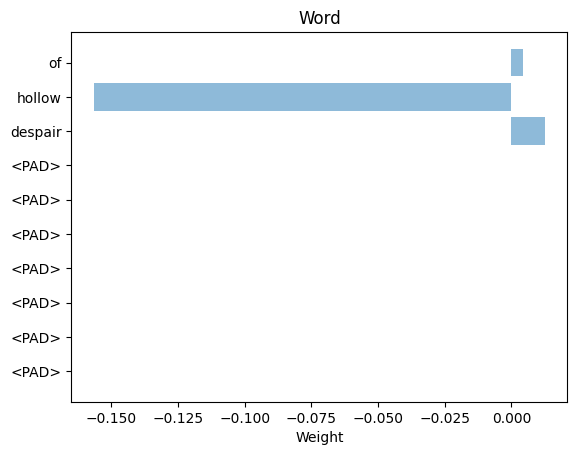

Experiment #1
Explanation for class 0


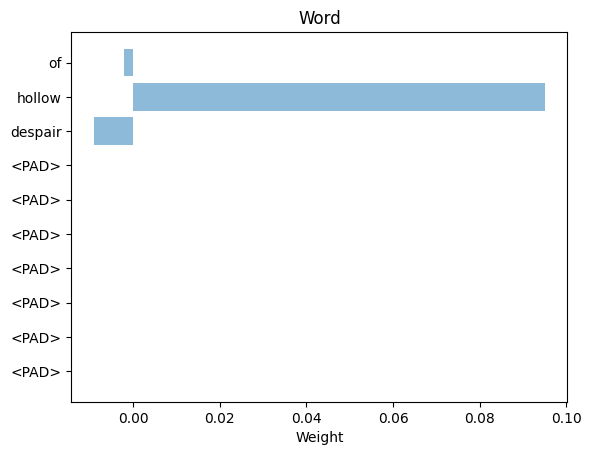

Explanation for class 1


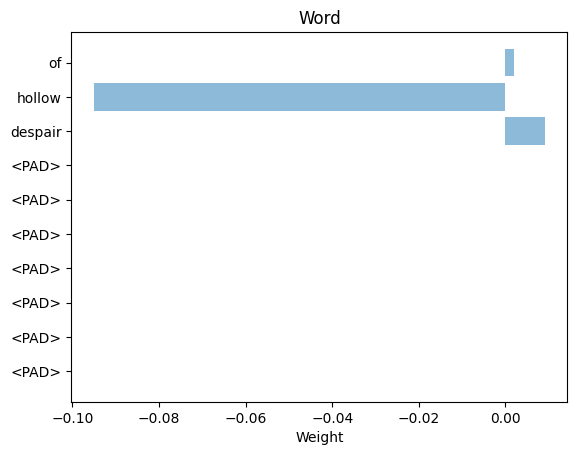

Experiment #2
Explanation for class 0


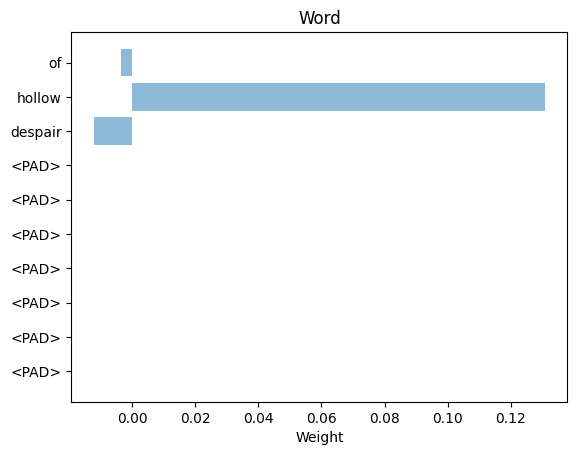

Explanation for class 1


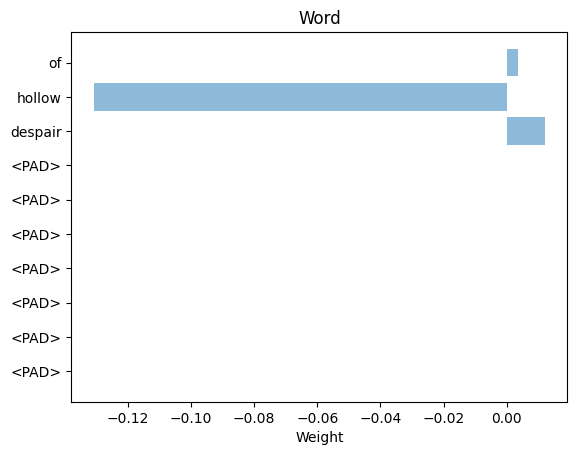

Experiment #3
Explanation for class 0


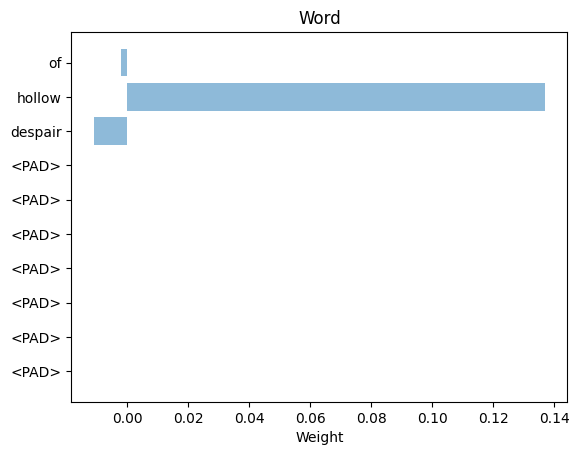

Explanation for class 1


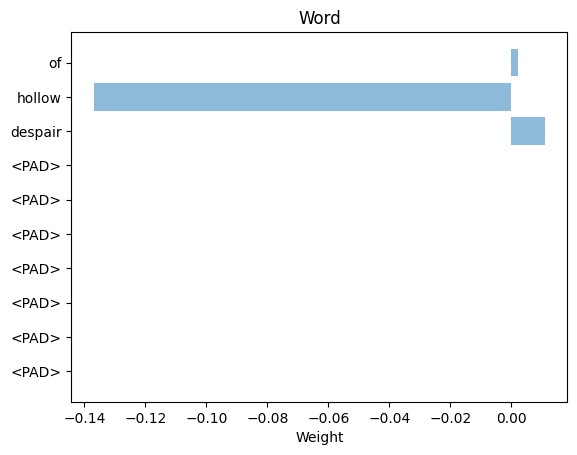

Experiment #4
Explanation for class 0


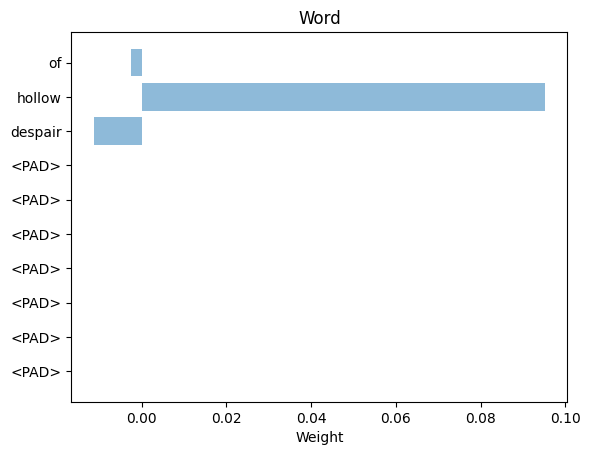

Explanation for class 1


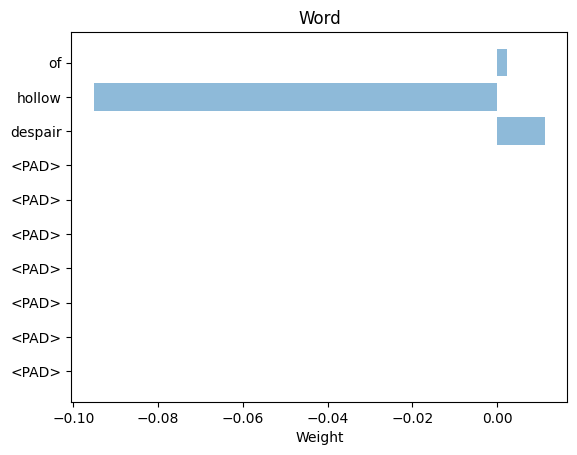

Experiment #5
Explanation for class 0


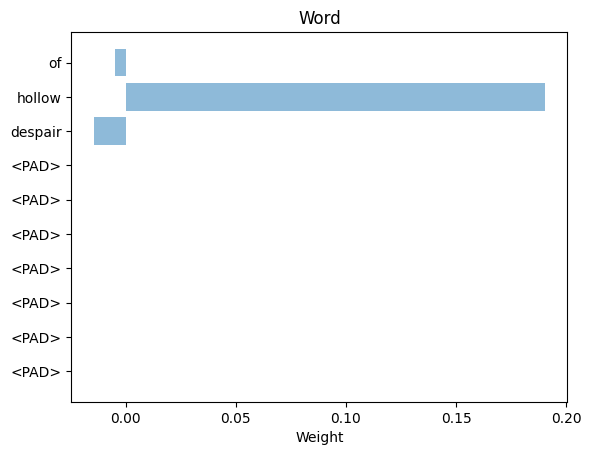

Explanation for class 1


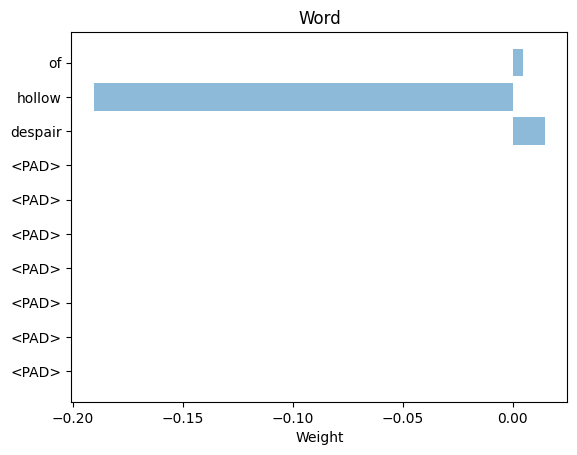

Experiment #6
Explanation for class 0


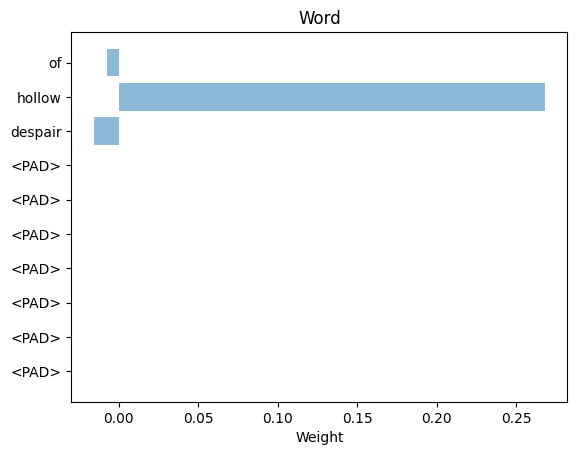

Explanation for class 1


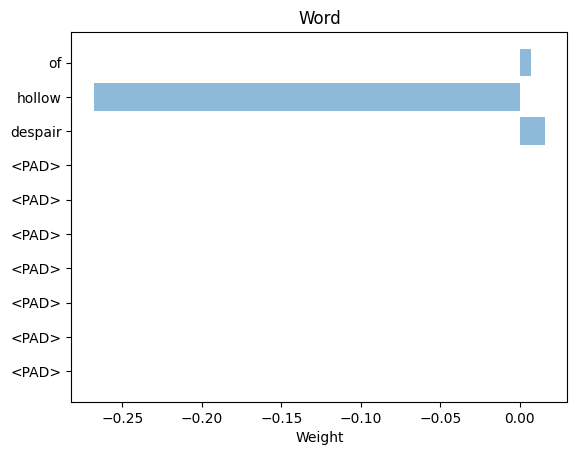

Experiment #7
Explanation for class 0


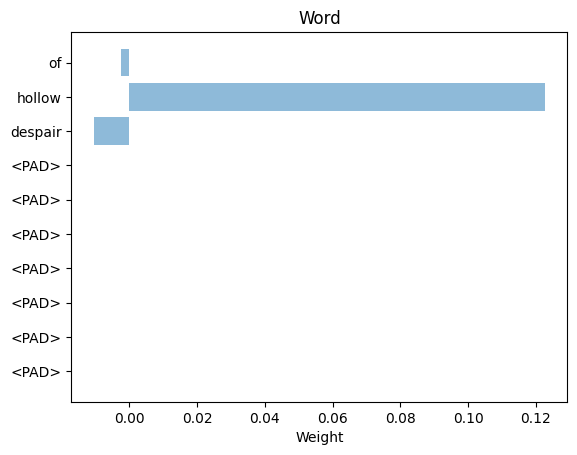

Explanation for class 1


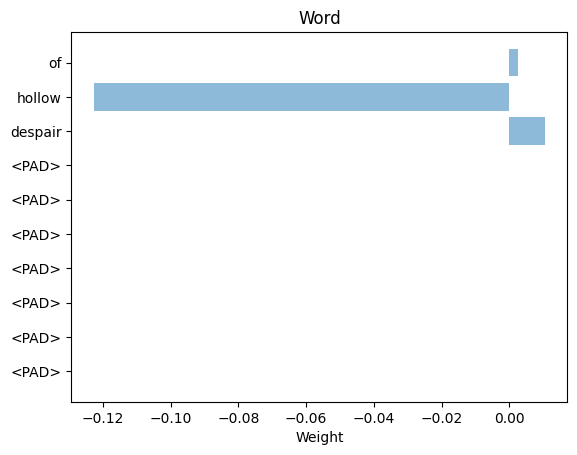

Experiment #8
Explanation for class 0


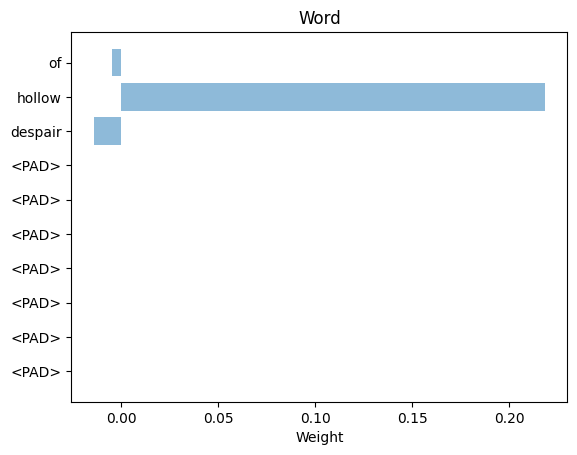

Explanation for class 1


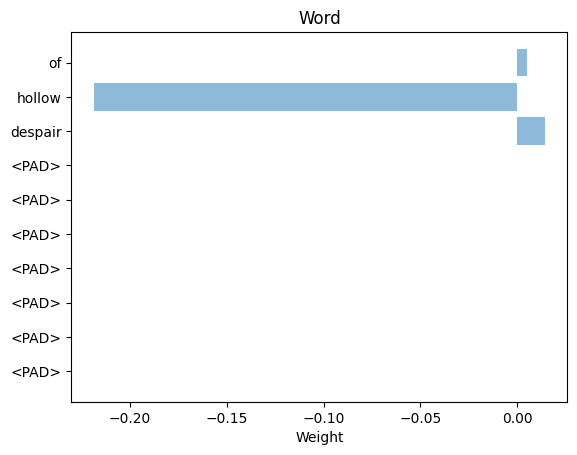

Experiment #9
Explanation for class 0


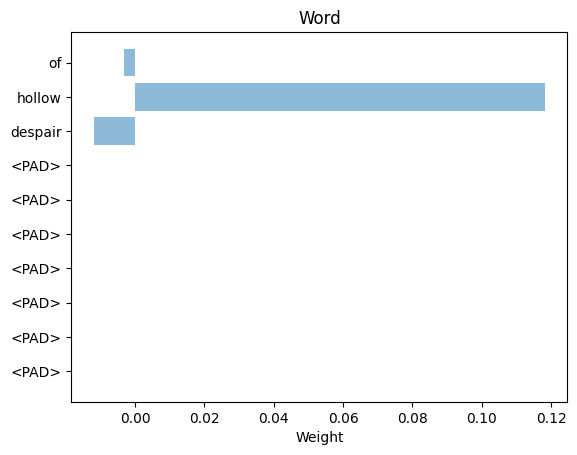

Explanation for class 1


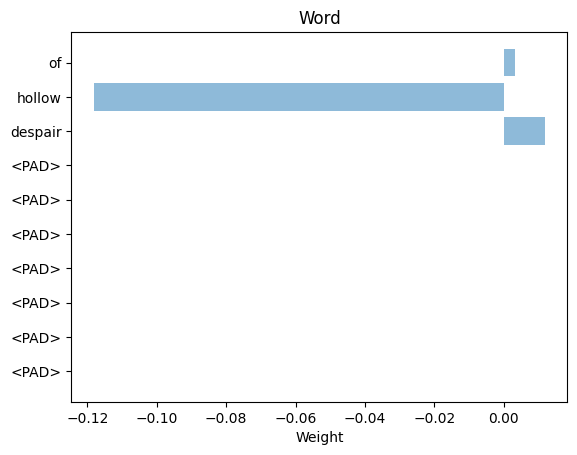

Experiment #10
Explanation for class 0


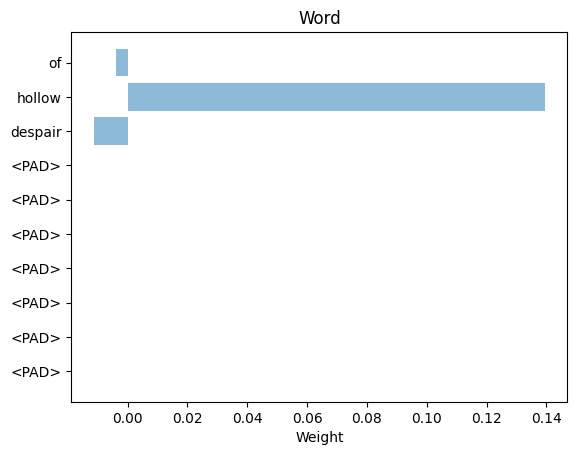

Explanation for class 1


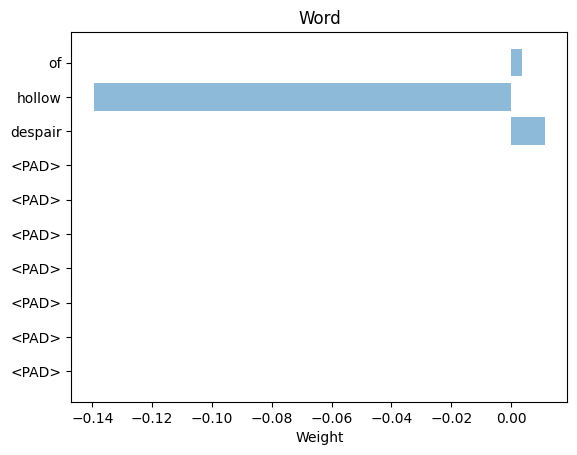

Experiment #11
Explanation for class 0


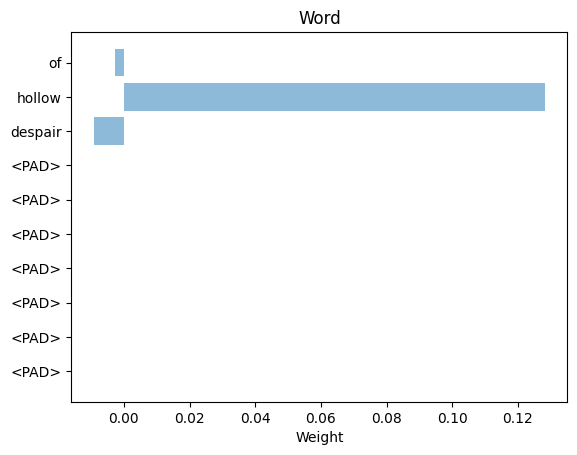

Explanation for class 1


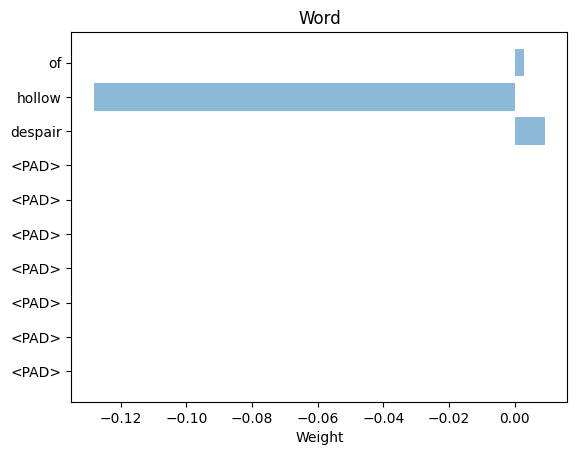

Experiment #12
Explanation for class 0


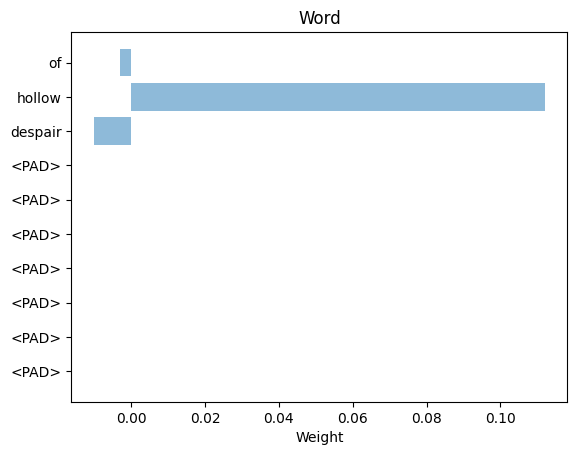

Explanation for class 1


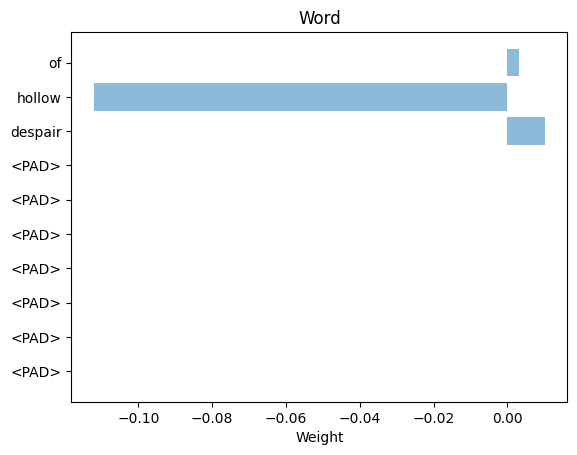

Experiment #13
Explanation for class 0


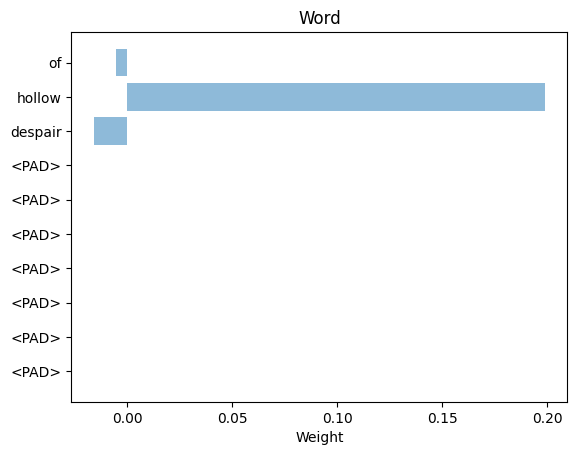

Explanation for class 1


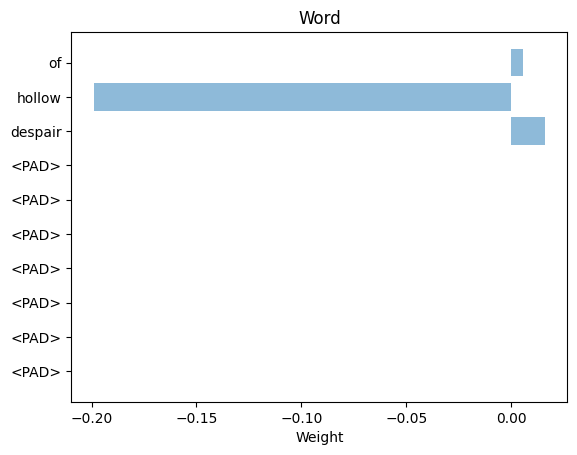

Experiment #14
Explanation for class 0


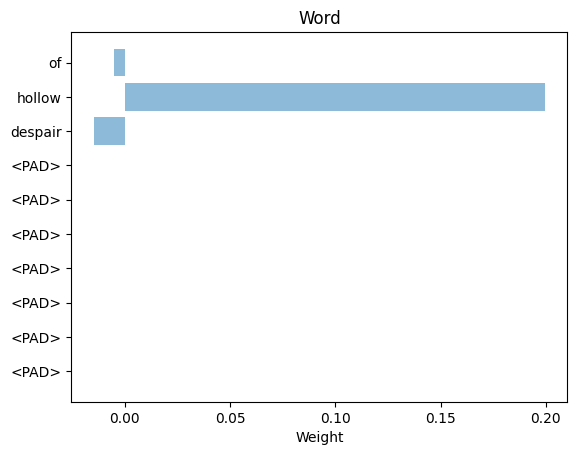

Explanation for class 1


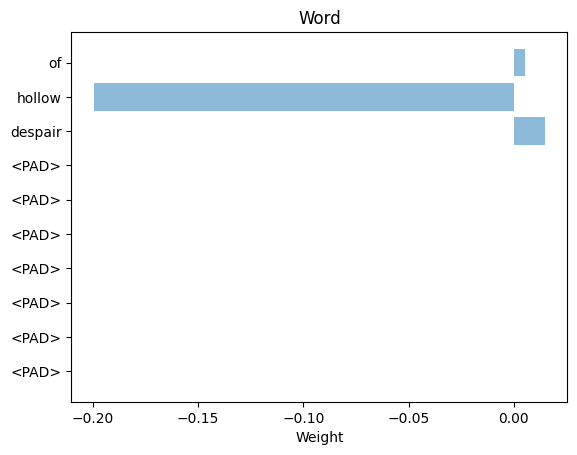

Experiment #15
Explanation for class 0


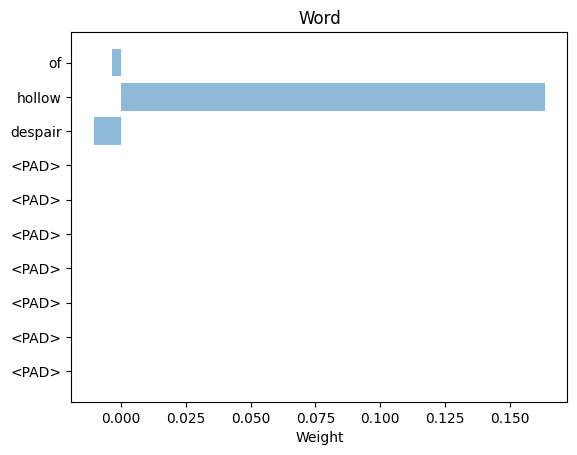

Explanation for class 1


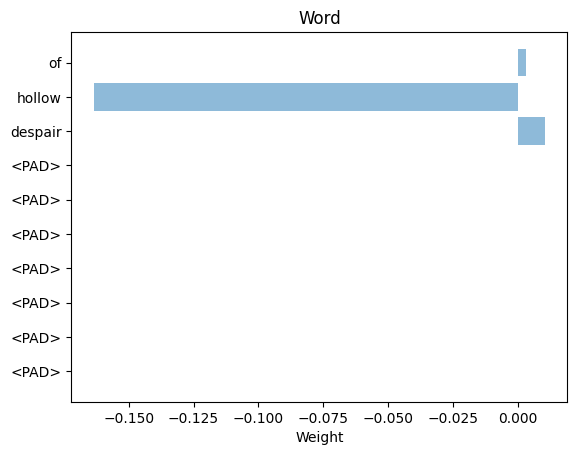

Experiment #16
Explanation for class 0


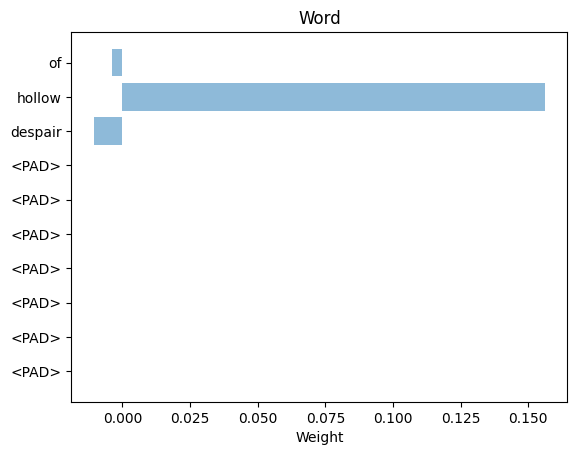

Explanation for class 1


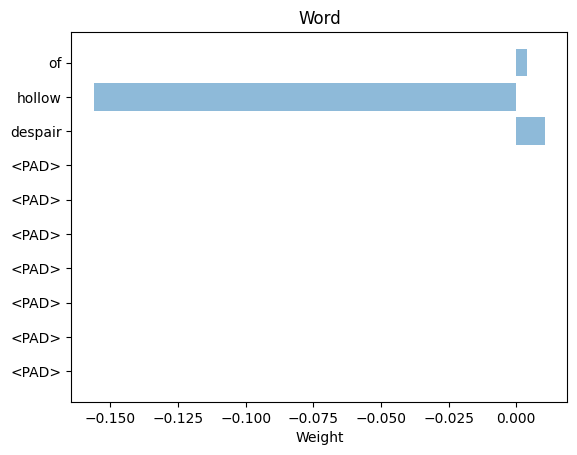

Experiment #17
Explanation for class 0


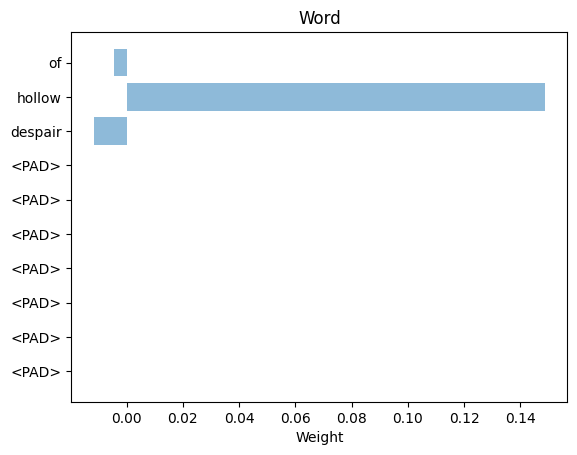

Explanation for class 1


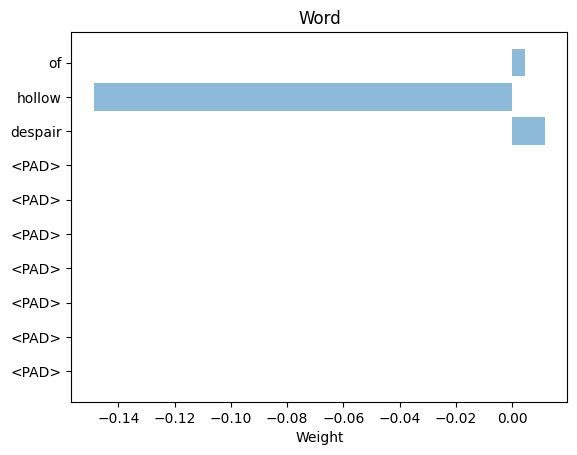

Experiment #18
Explanation for class 0


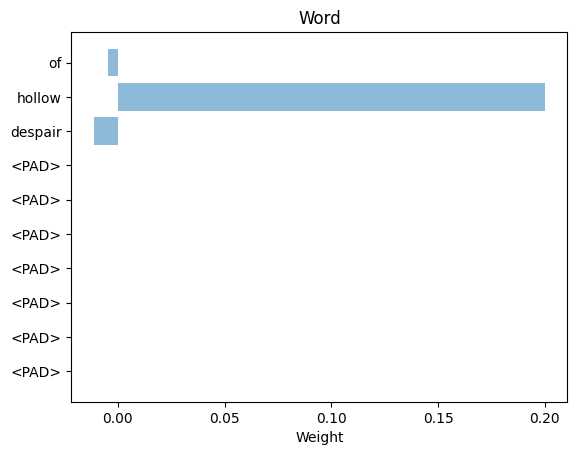

Explanation for class 1


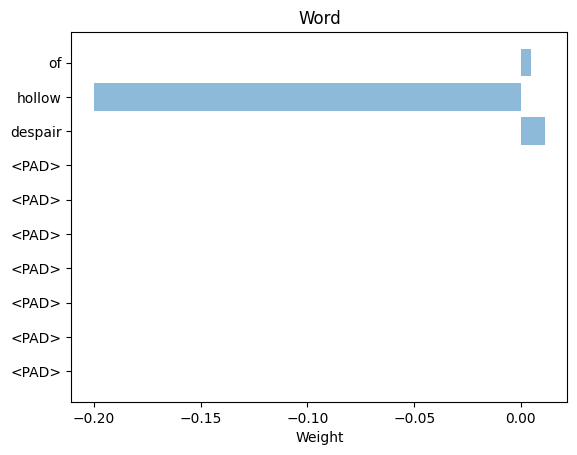

Experiment #19
Explanation for class 0


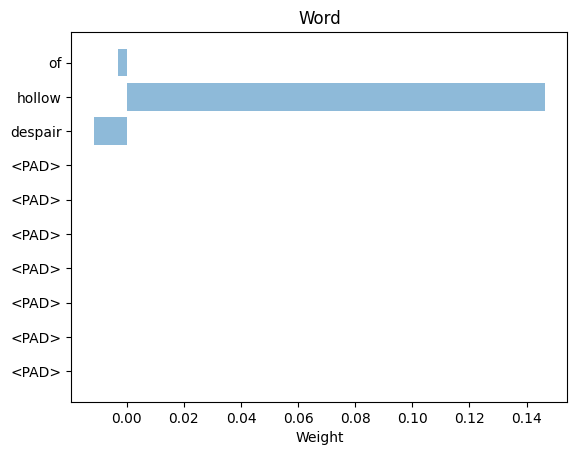

Explanation for class 1


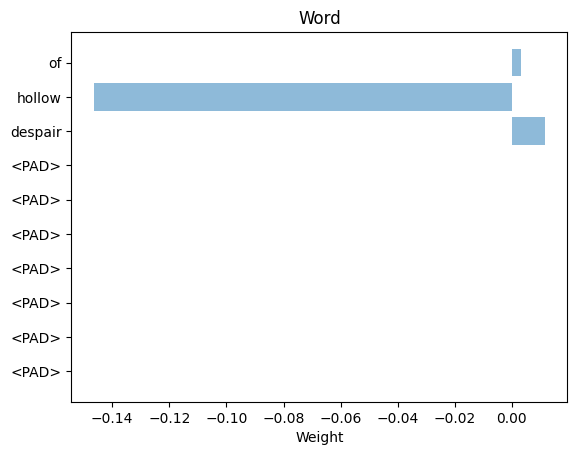


------------------------------------------------------------------



In [48]:
idxs = [65186,83333]
# 1 positive 0 negative
y_trues = [1,0]

for ii in range(len(idxs)):
    idx = idxs[ii]
    y_true = y_trues[ii]

    input_path = 'X_tmp.npy'
    output_path = f'exps/exps_idx{idx}_{y_true}'
    y_path = 'y_tmp.npy'


    exps = []
    for f in os.listdir(output_path):
        if os.path.isfile(os.path.join(output_path,f)) and not f.startswith('X') and not f.startswith('y'):
            tmp = np.load(os.path.join(output_path,f))
            exps.append(tmp)

    sentence = text_train[idx]
    print('Input:',sentence)
    print('Class:',y_true)
    for jj,exs in enumerate(exps):
        print('Experiment #'+str(jj))
        for i in range(2):
            ex = exs[i]
            print('Explanation for class',i)
            print_exp(ex,text_train[idx])
            
    print()
    print('------------------------------------------------------------------')
    print()
    

Input: ['in', 'a', 'collectively', 'stellar', 'performance']
Class: 1
Average explanation for class 0


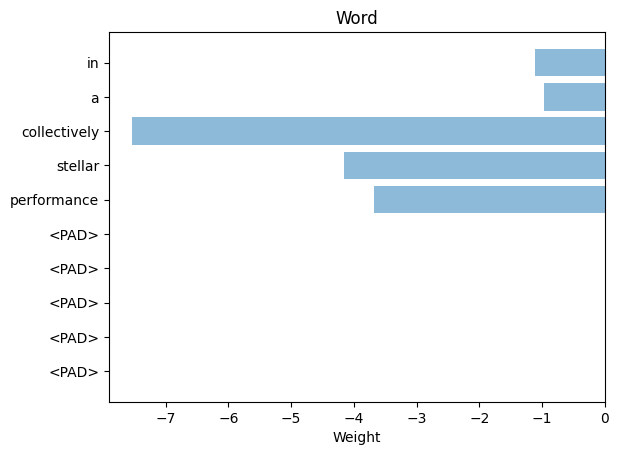

Average explanation for class 1


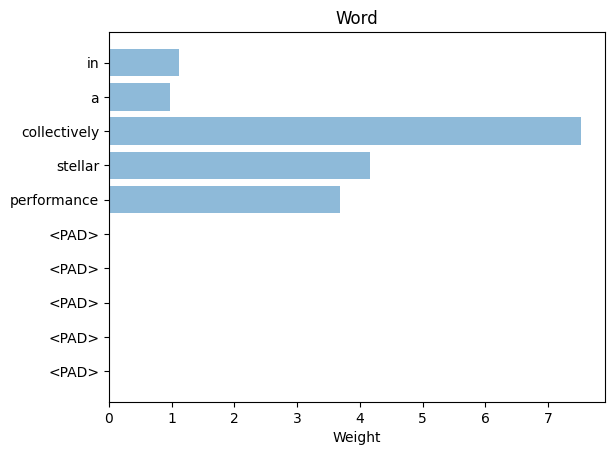


------------------------------------------------------------------

Input: ['of', 'hollow', 'despair']
Class: 0
Average explanation for class 0


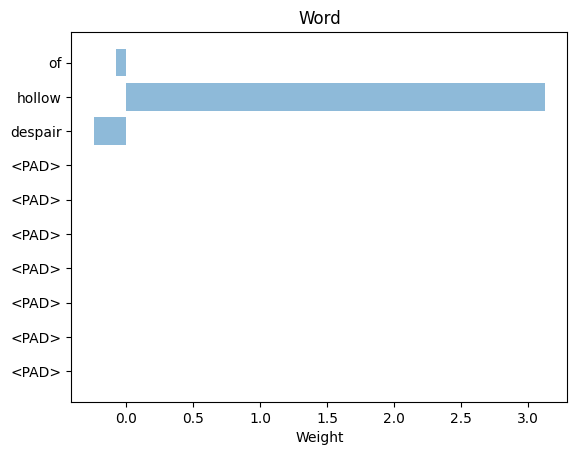

Average explanation for class 1


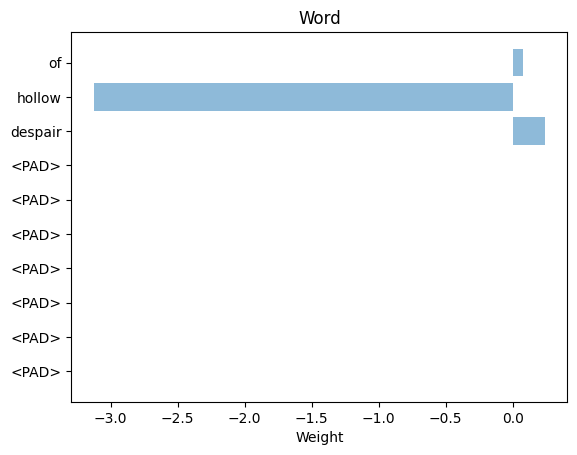


------------------------------------------------------------------



In [50]:
for ii in range(len(idxs)):
    idx = idxs[ii]
    y_true = y_trues[ii]

    input_path = 'X_tmp.npy'
    output_path = f'exps/exps_idx{idx}_{y_true}'
    y_path = 'y_tmp.npy'

    av_explain = dict()
    exps = []
    for f in os.listdir(output_path):
        if os.path.isfile(os.path.join(output_path,f)) and not f.startswith('X') and not f.startswith('y'):
            tmp = np.load(os.path.join(output_path,f))
            exps.append(tmp)

    sentence = text_train[idx]
    print('Input:',sentence)
    print('Class:',y_true)
    for jj,exs in enumerate(exps):
        for i in range(2):
            ex = exs[i]
            if not i in av_explain.keys():
                av_explain[i] = ex
            else:
                av_explain[i] += ex
            
    for i in range(2):
        print('Average explanation for class',i)
        print_exp(av_explain[i],text_train[idx])
    print()
    print('------------------------------------------------------------------')
    print()

# Misclassified example test runs

In [52]:
N = 50

while True:
    # pick a random input
    n = np.random.choice(list(range(len(X_train))))
    X = X_train[n].reshape(1,*X_train[n].shape)
    y_hat = np.argmax(bayes_model.predict(X,n=N))
    y_class = 'Positive.' if y_hat == 1 else 'Negative.'
    y_true_text = 'Positive.' if y_train[n] == 1 else 'Negative.'
    input_shape = X.flatten().shape
    if not y_hat == y_train[n]:
        break
        
print(n)
print(text_train[n])
print('Prediction:',y_class,'Ground truth:',y_true_text)

35818
['a', 'sultry', 'evening', 'or', 'a', 'beerfueled', 'afternoon', 'in', 'the', 'sun', 'can', 'inspire', 'even', 'the', 'most', 'retiring', 'heart', 'to', 'venture', 'forth']
Prediction: Negative. Ground truth: Positive.


In [53]:
input_path = 'X_tmp.npy'
y_path = 'y_tmp.npy'
output_path = f'exps/exps_idx{n}_{y_train[n]}'
if not os.path.exists(output_path):
    os.mkdir(output_path)
np.save(os.path.join(output_path,input_path),X.astype("float32"),False)
np.save(os.path.join(output_path,y_path),y_hat.astype("float32"),False)
iterations = 20
for i in range(iterations):
    subprocess.Popen(['python3','get_ig_exp.py',str(i),model_name,os.path.join(output_path,input_path),output_path,str(2)])

full = False 
while not full:
    if len([name for name in os.listdir(output_path) if os.path.isfile(os.path.join(output_path, name))]) >= (iterations+1):
        full = True

Input: ['a', 'sultry', 'evening', 'or', 'a', 'beerfueled', 'afternoon', 'in', 'the', 'sun', 'can', 'inspire', 'even', 'the', 'most', 'retiring', 'heart', 'to', 'venture', 'forth']
Class: 0
Average explanation for class 0


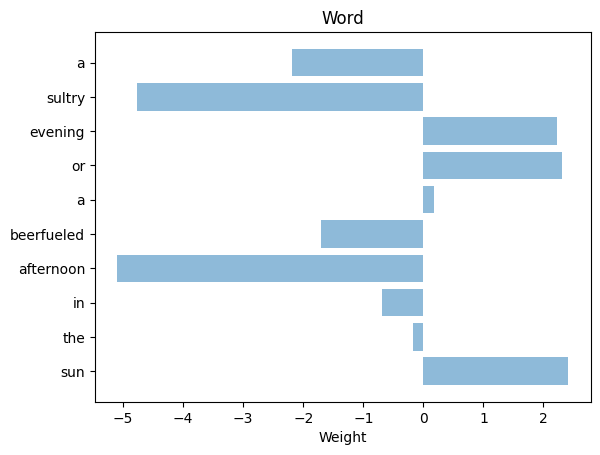

Average explanation for class 1


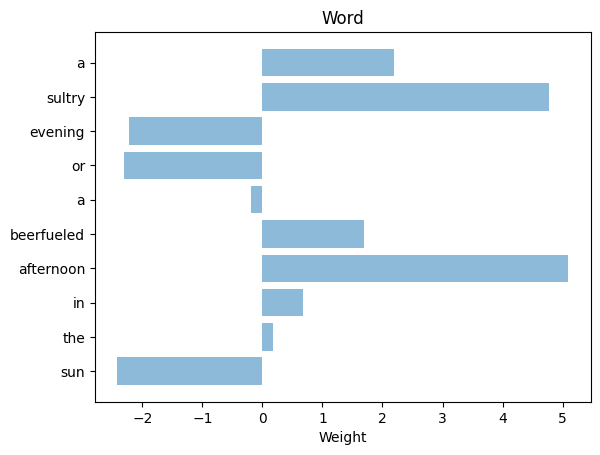


------------------------------------------------------------------



In [55]:
idxs = [35818]
# 1 positive 0 negative
y_trues = [0]

for ii in range(len(idxs)):
    idx = idxs[ii]
    y_true = y_trues[ii]

    input_path = 'X_tmp.npy'
    output_path = f'exps/exps_idx{idx}_{1}'
    y_path = 'y_tmp.npy'

    av_explain = dict()
    exps = []
    for f in os.listdir(output_path):
        if os.path.isfile(os.path.join(output_path,f)) and not f.startswith('X') and not f.startswith('y'):
            tmp = np.load(os.path.join(output_path,f))
            exps.append(tmp)

    sentence = text_train[idx]
    print('Input:',sentence)
    print('Class:',y_true)
    for jj,exs in enumerate(exps):
        for i in range(2):
            ex = exs[i]
            if not i in av_explain.keys():
                av_explain[i] = ex
            else:
                av_explain[i] += ex
            
    for i in range(2):
        print('Average explanation for class',i)
        print_exp(av_explain[i],text_train[idx])
    print()
    print('------------------------------------------------------------------')
    print()

# Highly uncertain test runs

In [83]:
N = 50

while True:
    # pick a random input
    n = np.random.choice(list(range(len(X_train))))
    X = X_train[n].reshape(1,*X_train[n].shape)
    ys = []
    for i in range(N):
        bayes_model.model.set_weights(bayes_model.sample())
        ys.append(bayes_model.model(X))
    ys = np.argmax(np.array(ys),axis=2).flatten()
    md = scipy.stats.mode(ys)[0]
    y_hat = md[0]
    y_class = 'Positive.' if y_hat == 1 else 'Negative.'
    y_true_text = 'Positive.' if y_train[n] == 1 else 'Negative.'
    input_shape = X.flatten().shape
    ys = list(ys)
    if ys.count(md) < int(len(ys)*0.75):
        break
    
print(n)
print(ys)
print(text_train[n])
print('Prediction:',y_class,'Ground truth:',y_true_text)

6139
[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
['the', 'film', 'misses', 'the', 'brilliance', 'of', 'jelineks', 'novel', 'by', 'some', 'way', '', 'it', 'settles', 'for', 'being', 'merely', 'grim']
Prediction: Negative. Ground truth: Negative.


In [84]:
input_path = 'X_tmp.npy'
y_path = 'y_tmp.npy'
output_path = f'exps/exps_idx{n}_{y_train[n]}'
if not os.path.exists(output_path):
    os.mkdir(output_path)
np.save(os.path.join(output_path,input_path),X.astype("float32"),False)
np.save(os.path.join(output_path,y_path),y_hat.astype("float32"),False)
iterations = 20
for i in range(iterations):
    subprocess.Popen(['python3','get_ig_exp.py',str(i),model_name,os.path.join(output_path,input_path),output_path,str(2)])

full = False 
while not full:
    if len([name for name in os.listdir(output_path) if os.path.isfile(os.path.join(output_path, name))]) >= (iterations+1):
        full = True

Input: ['the', 'film', 'misses', 'the', 'brilliance', 'of', 'jelineks', 'novel', 'by', 'some', 'way', '', 'it', 'settles', 'for', 'being', 'merely', 'grim']
Class: 0

sample # 0
class 0 expl


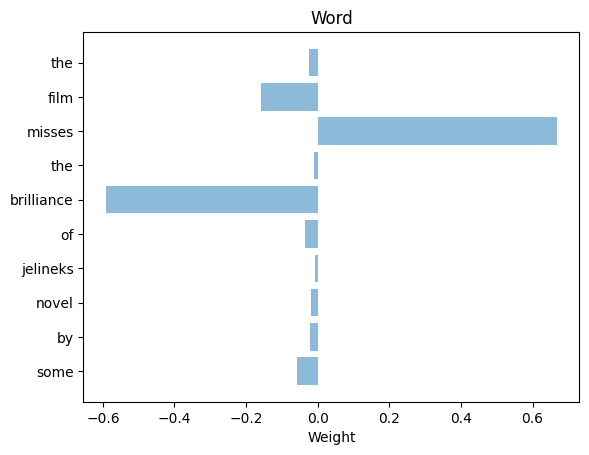

class 1 expl


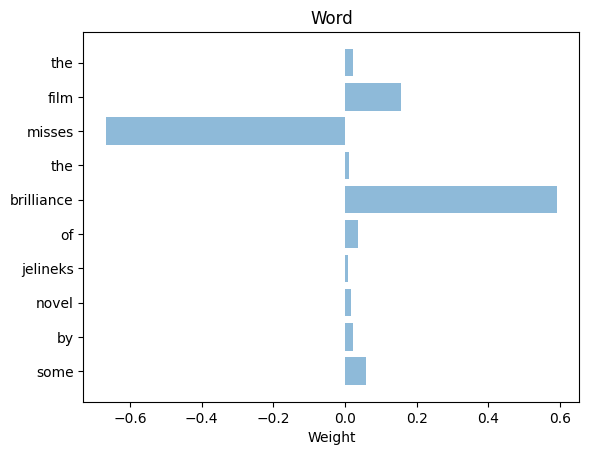

sample # 1
class 0 expl


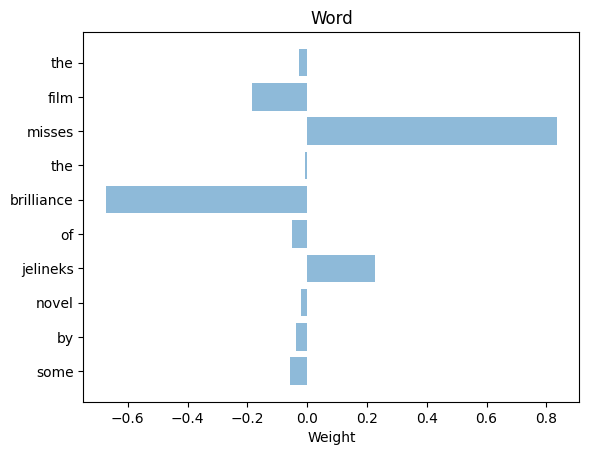

class 1 expl


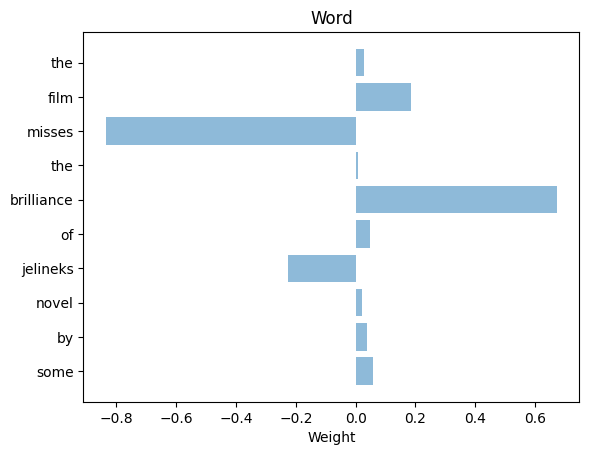

sample # 2
class 0 expl


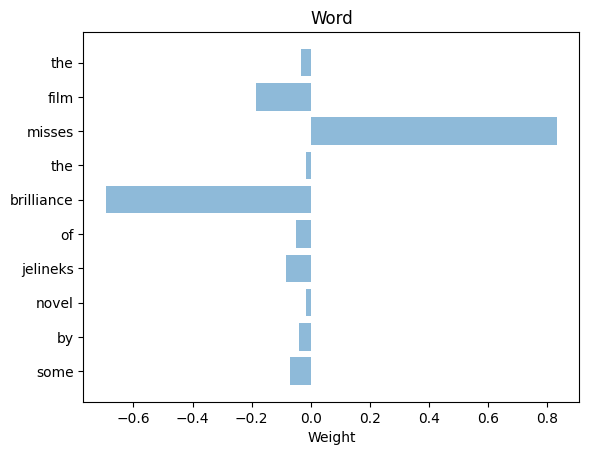

class 1 expl


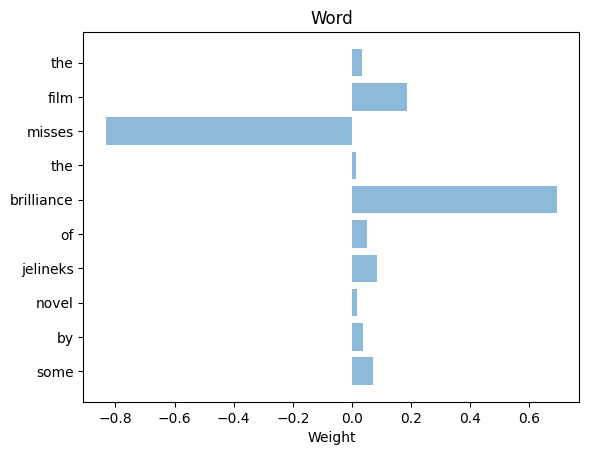

sample # 3
class 0 expl


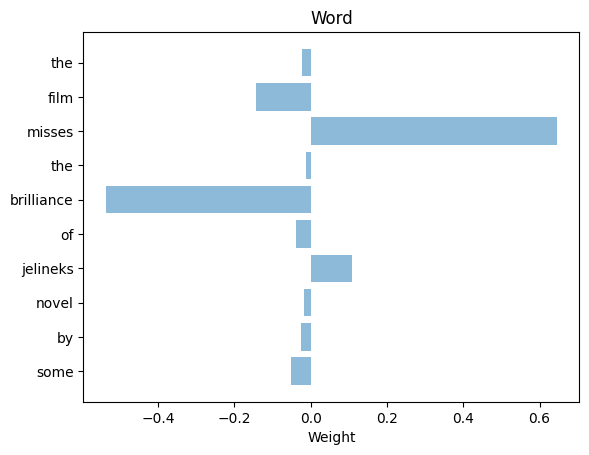

class 1 expl


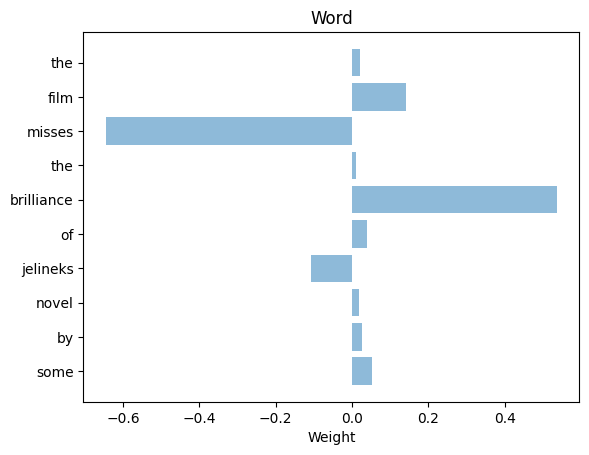

sample # 4
class 0 expl


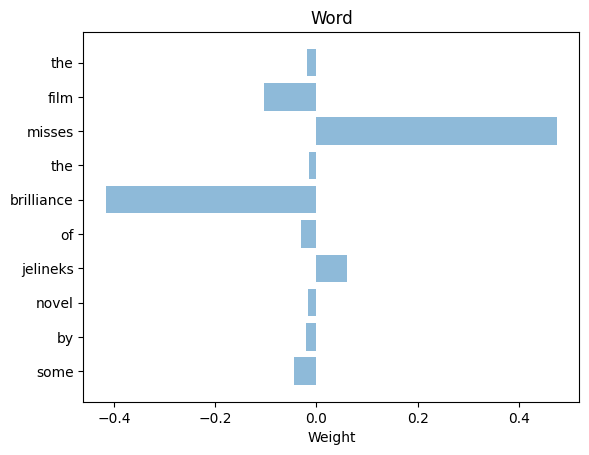

class 1 expl


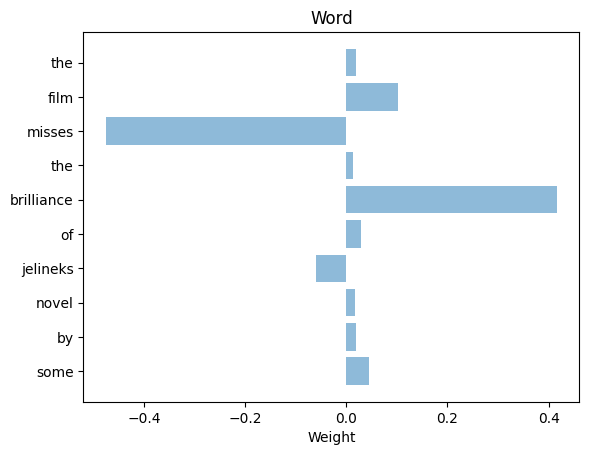

sample # 5
class 0 expl


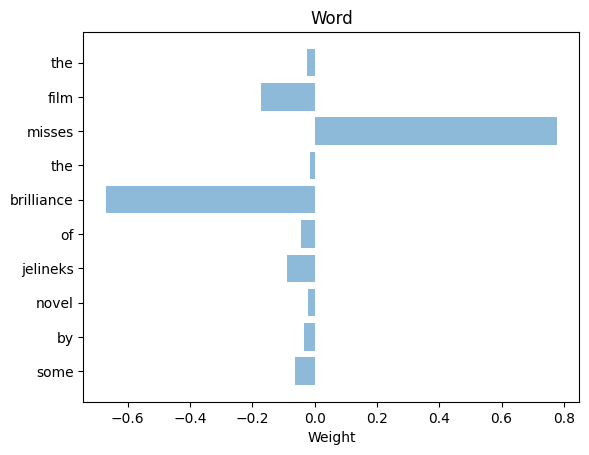

class 1 expl


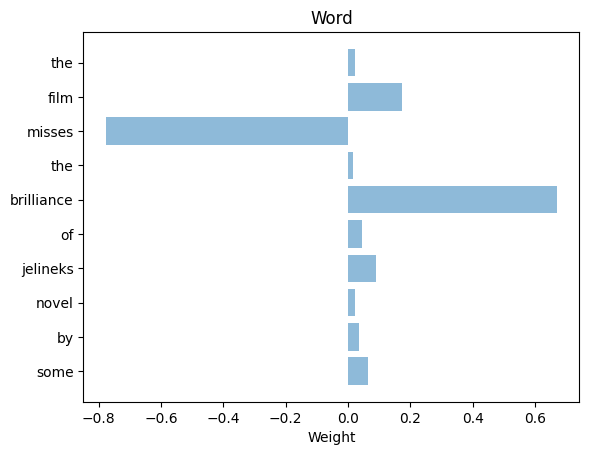

sample # 6
class 0 expl


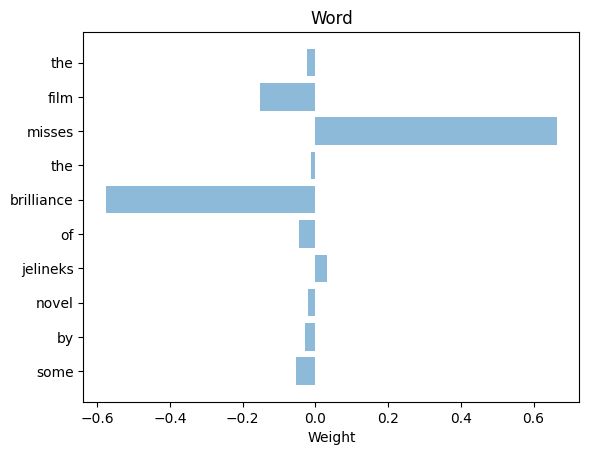

class 1 expl


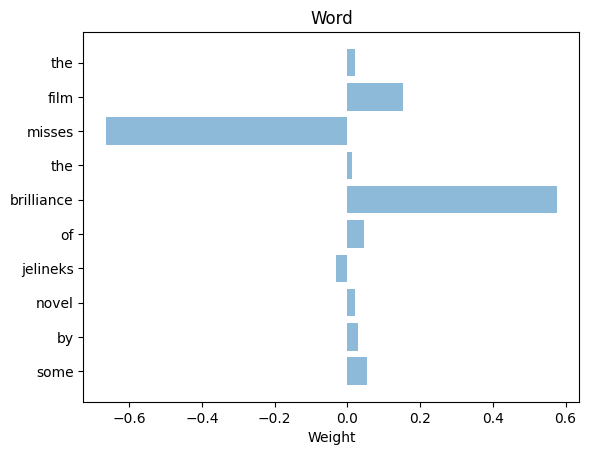

sample # 7
class 0 expl


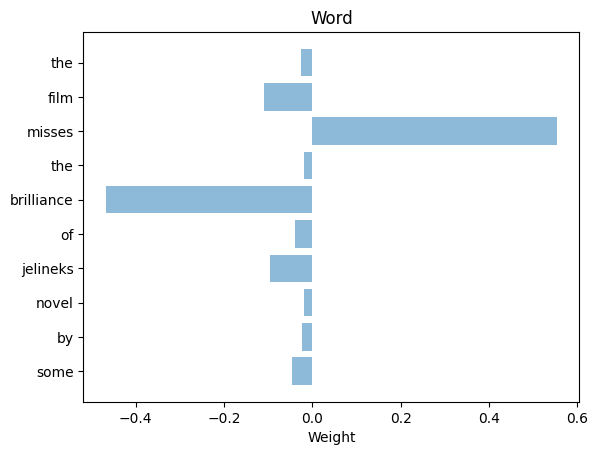

class 1 expl


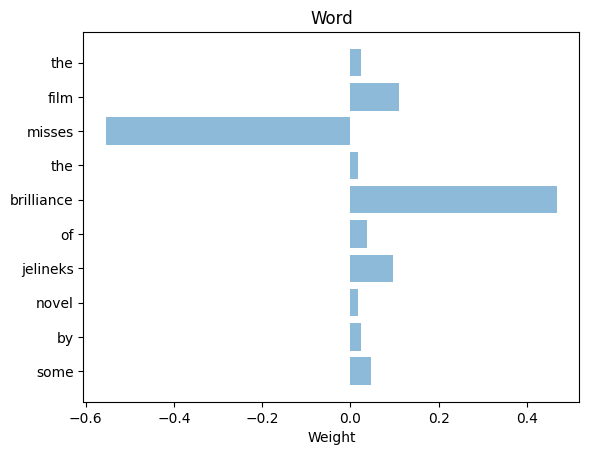

sample # 8
class 0 expl


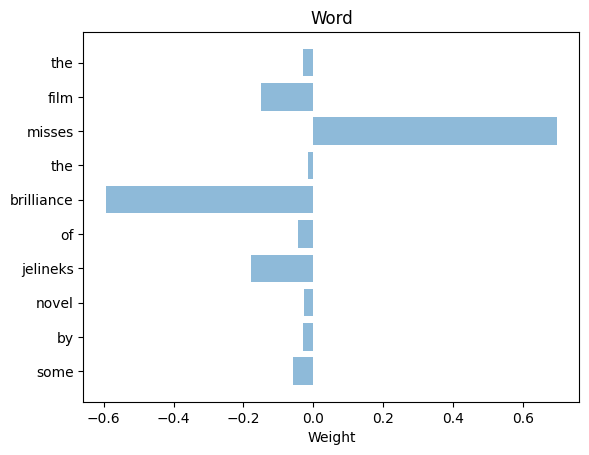

class 1 expl


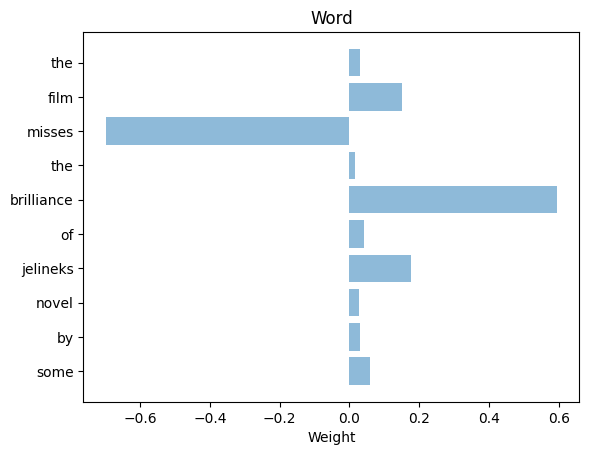

sample # 9
class 0 expl


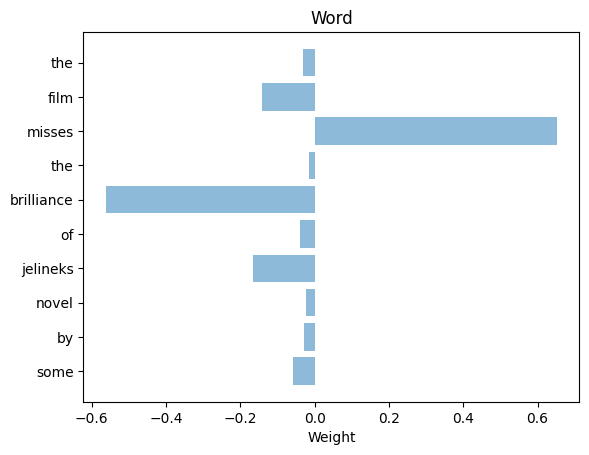

class 1 expl


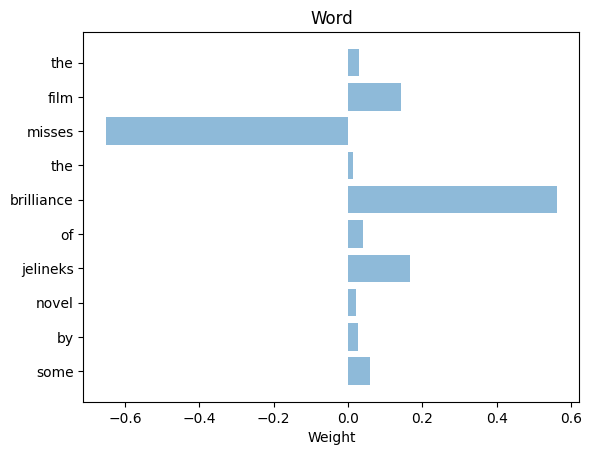

sample # 10
class 0 expl


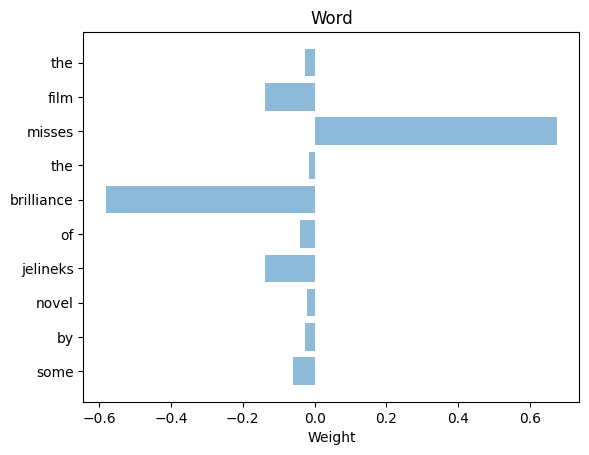

class 1 expl


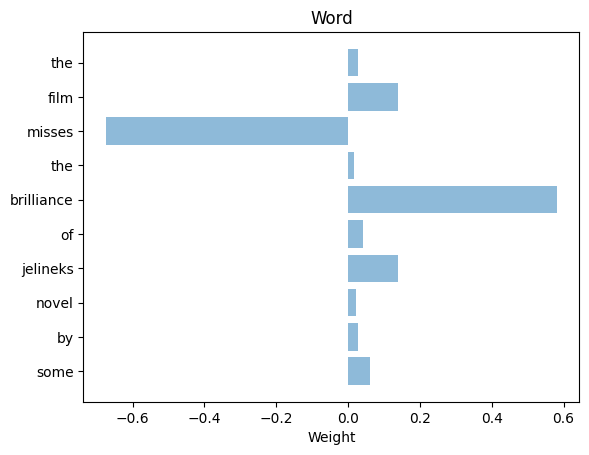

sample # 11
class 0 expl


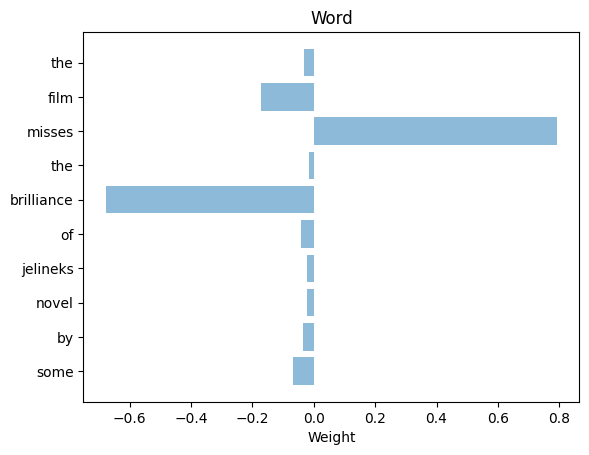

class 1 expl


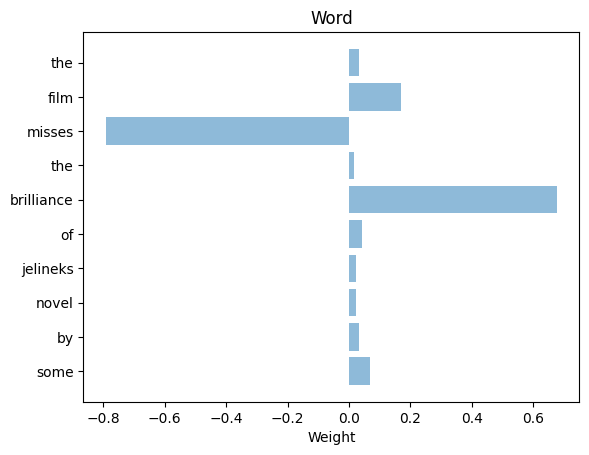

sample # 12
class 0 expl


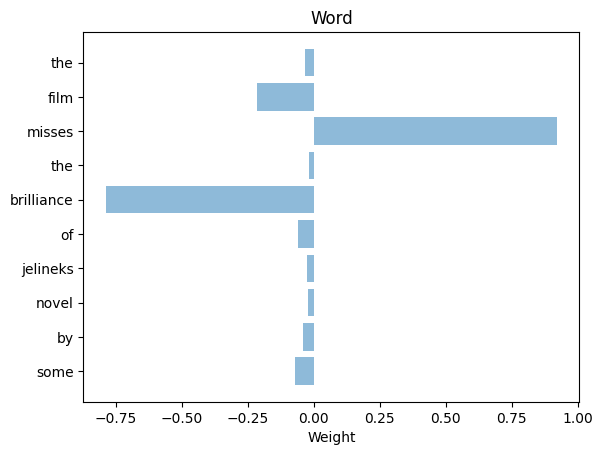

class 1 expl


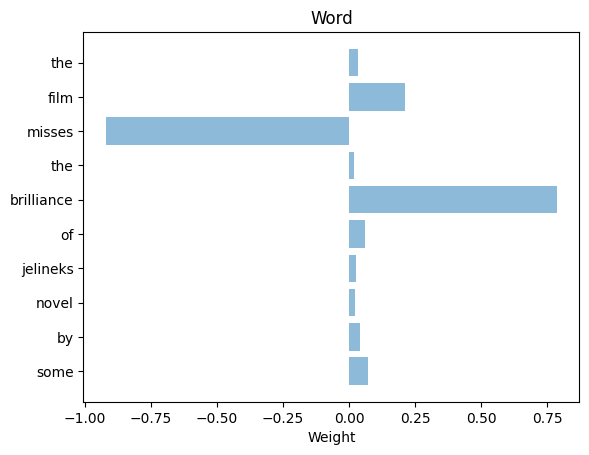

sample # 13
class 0 expl


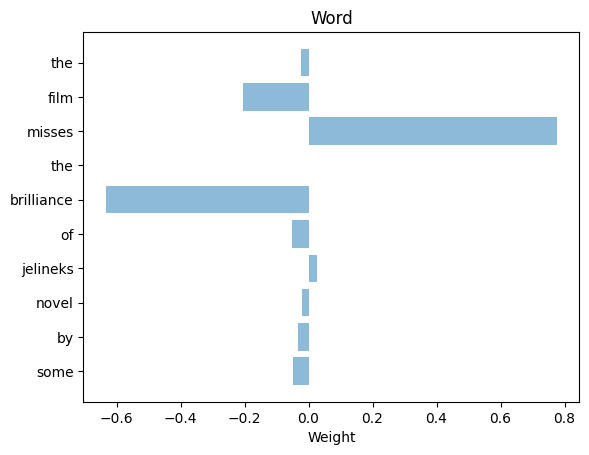

class 1 expl


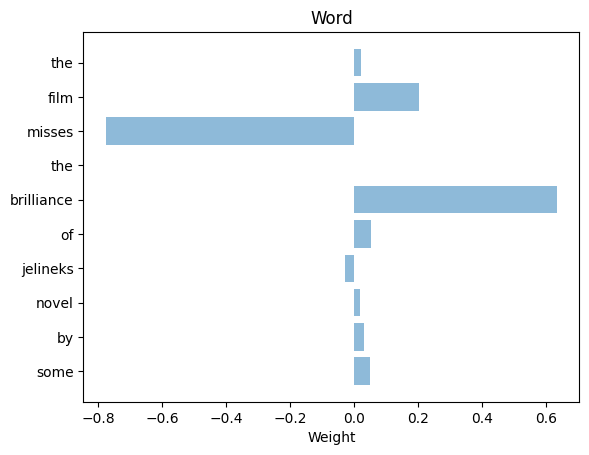

sample # 14
class 0 expl


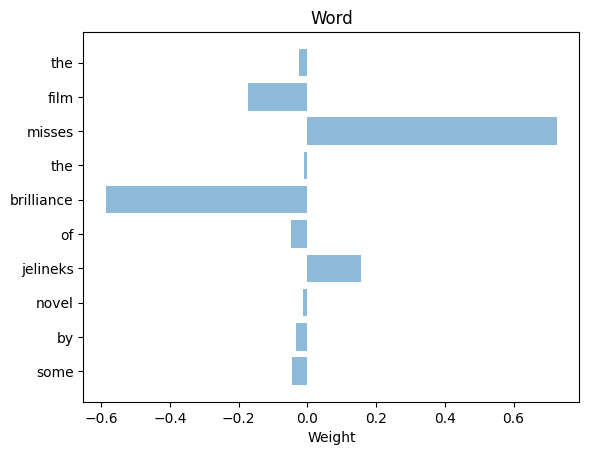

class 1 expl


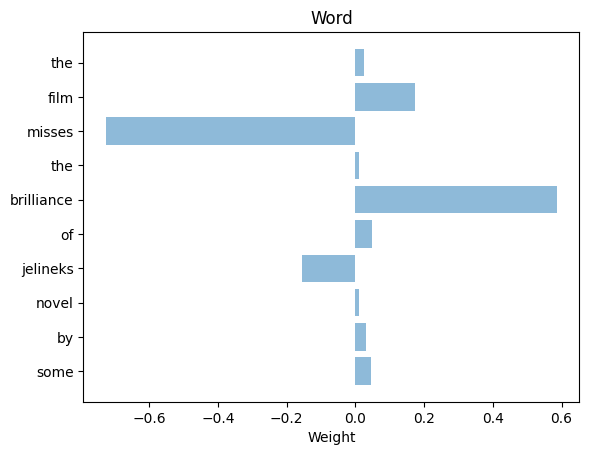

sample # 15
class 0 expl


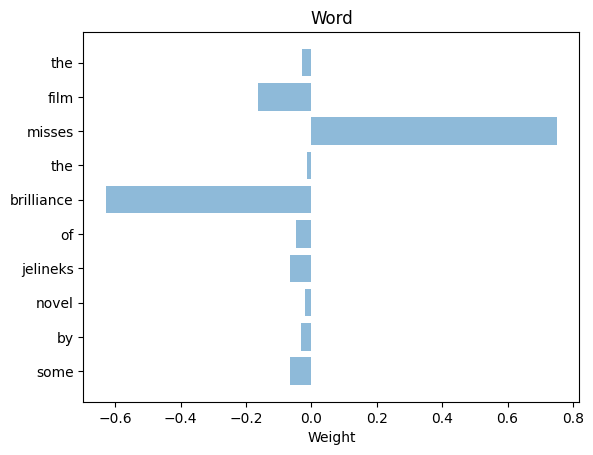

class 1 expl


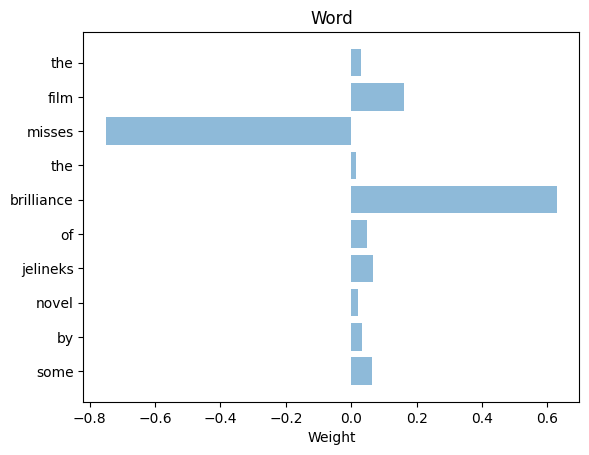

sample # 16
class 0 expl


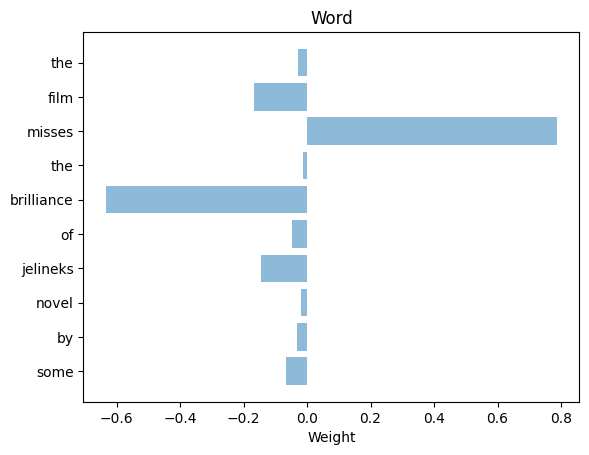

class 1 expl


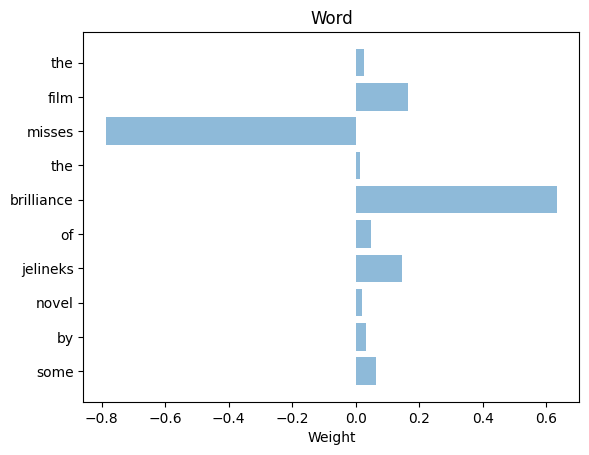

sample # 17
class 0 expl


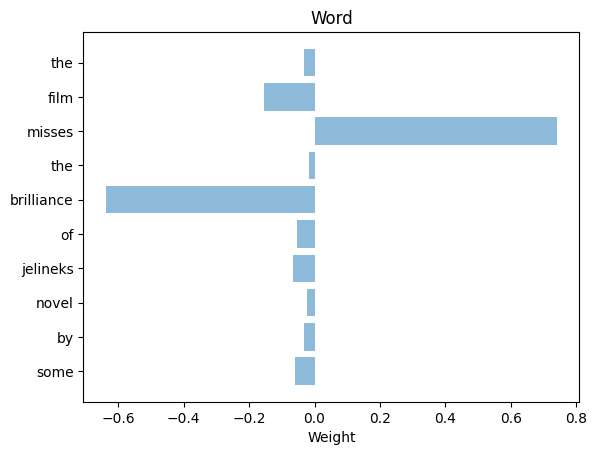

class 1 expl


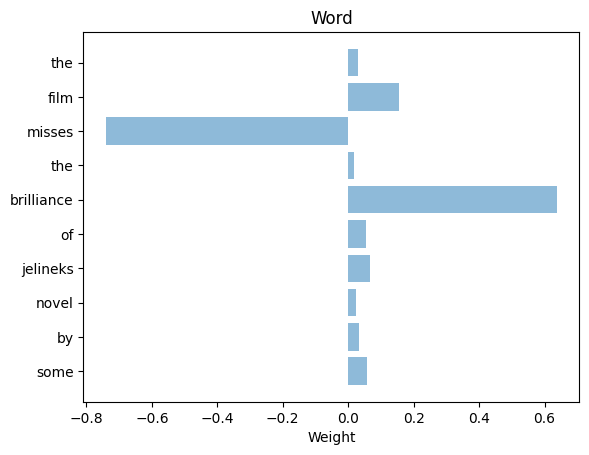

sample # 18
class 0 expl


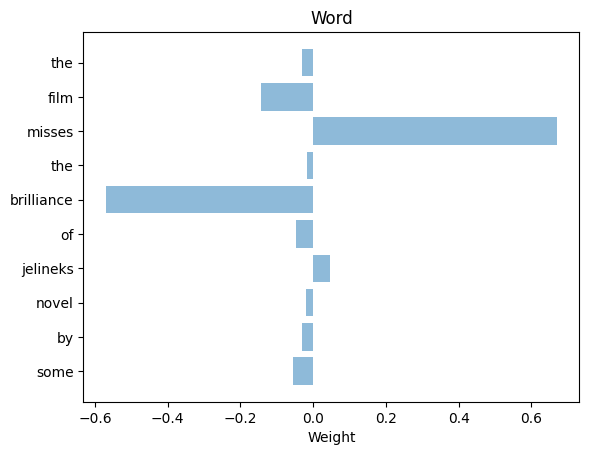

class 1 expl


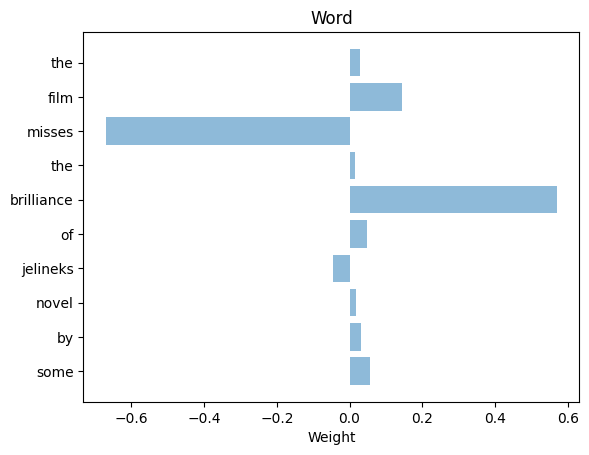

sample # 19
class 0 expl


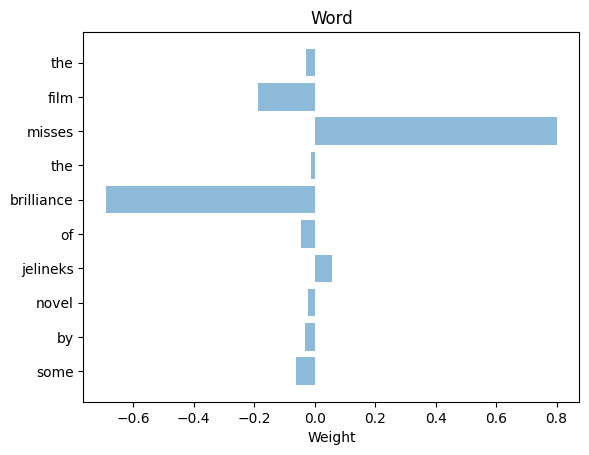

class 1 expl


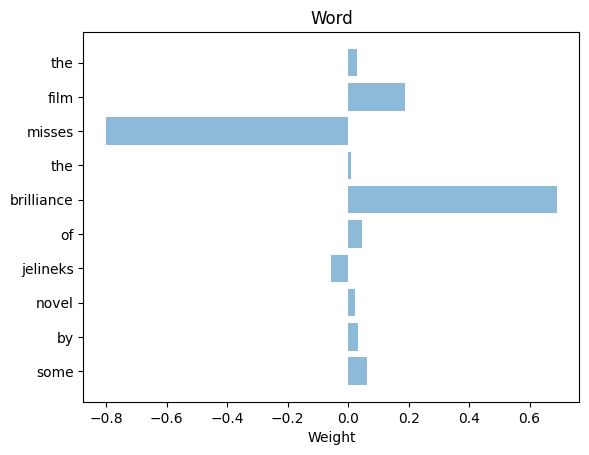


------------------------------------------------------------------



In [90]:
#idxs = [104964,6139]
# 1 positive 0 negative
#y_trues = [1,0]
idxs = [6139]
y_trues = [0]

for ii in range(len(idxs)):
    idx = idxs[ii]
    y_true = y_trues[ii]

    input_path = 'X_tmp.npy'
    output_path = f'exps/exps_idx{idx}_{y_true}'
    y_path = 'y_tmp.npy'

    av_explain = dict()
    exps = []
    for f in os.listdir(output_path):
        if os.path.isfile(os.path.join(output_path,f)) and not f.startswith('X') and not f.startswith('y'):
            tmp = np.load(os.path.join(output_path,f))
            exps.append(tmp)

    sentence = text_train[idx]
    print('Input:',sentence)
    print('Class:',y_true)
    print()
    for jj,exs in enumerate(exps):
        print('sample #',jj)
        for i in range(2):
            ex = exs[i]
            print('class',i,'expl')
            print_exp(ex,text_train[idx])
            if not i in av_explain.keys():
                av_explain[i] = ex
            else:
                av_explain[i] += ex
            
    #for i in range(2):
    #    print('Average explanation for class',i)
    #    print_exp(av_explain[i],text_train[idx])
    print()
    print('------------------------------------------------------------------')
    print()